In [1]:
import pandas as pd
import seaborn as srn
import numpy as np
from matplotlib import pyplot as plt
import statistics
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
#from sklearn.linear_model import LogisticRegression
# Warning 
from yellowbrick.regressor import ResidualsPlot 
import statsmodels.formula.api as sm

In [2]:
data = pd.read_excel('C:\\Users\\Riallen\\Documents\\Print_de_telas\\data2\\data_geral.xlsx')
data.head()

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9
1,1.83,1930,Mon Feb 13 09:34:36 2023,2023-02-13 09:34:36,2023-02-13,09:34:36,9
2,4.48,2073,Mon Feb 13 09:35:07 2023,2023-02-13 09:35:07,2023-02-13,09:35:07,9
3,6.58,2104,Mon Feb 13 09:35:42 2023,2023-02-13 09:35:42,2023-02-13,09:35:42,9
4,1.53,2065,Mon Feb 13 09:36:01 2023,2023-02-13 09:36:01,2023-02-13,09:36:01,9


In [3]:
data['Odds'].describe()

count    3308.000000
mean        9.271333
std        91.754512
min         1.000000
25%         1.290000
50%         1.960000
75%         3.937500
max      4339.900000
Name: Odds, dtype: float64

In [4]:
data['Qt_Apostadores'].describe()

count    3308.000000
mean     2100.227932
std      1009.730459
min        42.000000
25%      1435.000000
50%      2074.000000
75%      2787.000000
max      5180.000000
Name: Qt_Apostadores, dtype: float64

In [5]:
data['hour'].describe()

count    3308.000000
mean       10.901149
std         6.877314
min         0.000000
25%         5.000000
50%        11.000000
75%        17.000000
max        23.000000
Name: hour, dtype: float64

Text(0.5, 1.0, 'Odds')

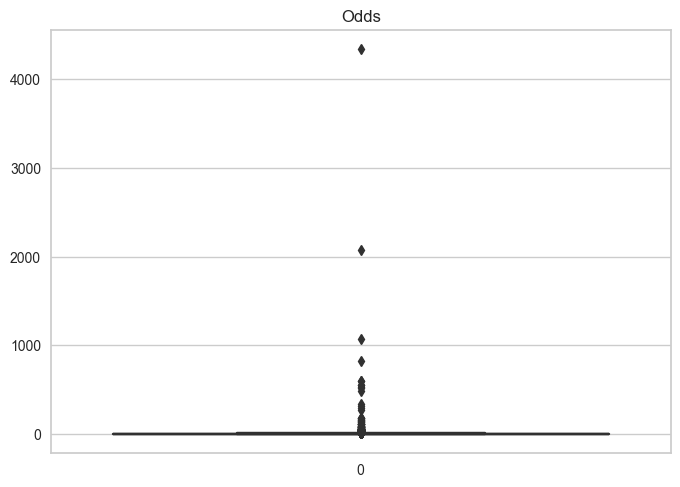

In [6]:
srn.boxplot(data['Odds']).set_title('Odds')

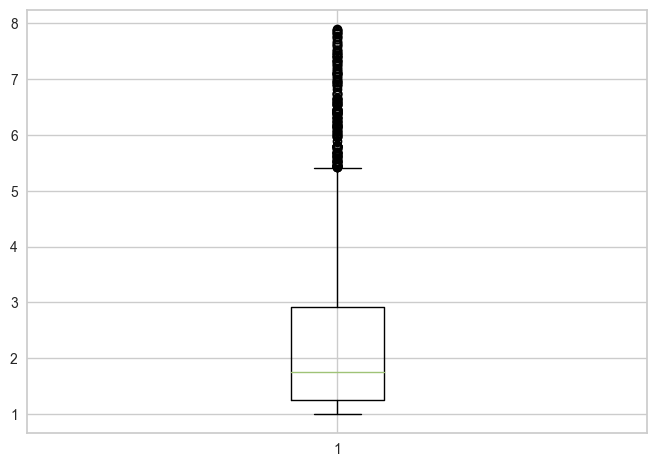

In [7]:
data_box_plot = np.array(data['Odds'])
q1 = np.percentile(data_box_plot, 25)
q3 = np.percentile(data_box_plot, 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
data_sem_outliers = [x for x in data_box_plot if x > lower_bound and x < upper_bound]

# Plotar o boxplot sem outliers
plt.boxplot(data_sem_outliers)
plt.show()

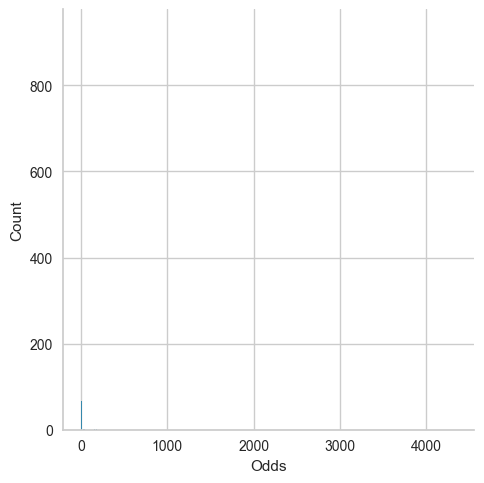

In [8]:
srn.displot(data['Odds'])

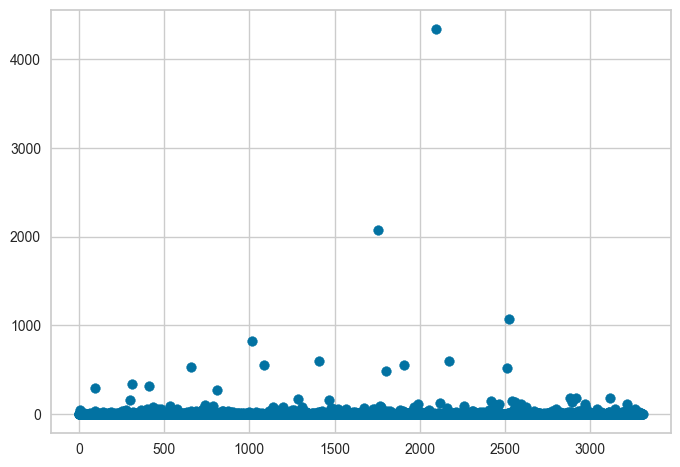

In [9]:
x = np.array(range(0,3308,1))
y = np.array(data['Odds'])
plt.scatter(x,y)

In [10]:
moda = statistics.mode(y)
moda

1.0

In [11]:
data['Odds'].value_counts()

1.00      118
1.01       36
1.07       35
1.05       34
1.06       34
         ... 
336.49      1
4.60        1
8.38        1
3.88        1
11.52       1
Name: Odds, Length: 888, dtype: int64

In [12]:
data[data["Odds"] == 1.00]

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
16,1.0,2117,Mon Feb 13 09:41:21 2023,2023-02-13 09:41:21,2023-02-13,09:41:21,9
141,1.0,1600,Mon Feb 13 10:30:52 2023,2023-02-13 10:30:52,2023-02-13,10:30:52,10
165,1.0,1824,Mon Feb 13 10:40:22 2023,2023-02-13 10:40:22,2023-02-13,10:40:22,10
189,1.0,1953,Mon Feb 13 10:49:37 2023,2023-02-13 10:49:37,2023-02-13,10:49:37,10
203,1.0,2536,Mon Feb 13 10:55:31 2023,2023-02-13 10:55:31,2023-02-13,10:55:31,10
...,...,...,...,...,...,...,...
3176,1.0,1725,Tue Feb 14 08:36:12 2023,2023-02-14 08:36:12,2023-02-14,08:36:12,8
3219,1.0,2110,Tue Feb 14 08:54:32 2023,2023-02-14 08:54:32,2023-02-14,08:54:32,8
3250,1.0,2549,Tue Feb 14 09:07:26 2023,2023-02-14 09:07:26,2023-02-14,09:07:26,9
3259,1.0,1995,Tue Feb 14 09:10:51 2023,2023-02-14 09:10:51,2023-02-14,09:10:51,9


In [13]:
118/len(data['Odds'])

0.035671100362756954

In [14]:
data[data["Odds"] <= 1.61] 

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9
4,1.53,2065,Mon Feb 13 09:36:01 2023,2023-02-13 09:36:01,2023-02-13,09:36:01,9
5,1.25,1740,Mon Feb 13 09:36:16 2023,2023-02-13 09:36:16,2023-02-13,09:36:16,9
7,1.60,2502,Mon Feb 13 09:36:59 2023,2023-02-13 09:36:59,2023-02-13,09:36:59,9
11,1.03,1778,Mon Feb 13 09:39:33 2023,2023-02-13 09:39:33,2023-02-13,09:39:33,9
...,...,...,...,...,...,...,...
3299,1.36,2194,Tue Feb 14 09:27:28 2023,2023-02-14 09:27:28,2023-02-14,09:27:28,9
3302,1.27,2207,Tue Feb 14 09:28:26 2023,2023-02-14 09:28:26,2023-02-14,09:28:26,9
3304,1.22,2137,Tue Feb 14 09:29:04 2023,2023-02-14 09:29:04,2023-02-14,09:29:04,9
3305,1.01,1793,Tue Feb 14 09:29:19 2023,2023-02-14 09:29:19,2023-02-14,09:29:19,9


In [15]:
1295/len(data['Odds'])

0.3914752116082225

In [16]:
data[data["Odds"] <= 1.40] 

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9
5,1.25,1740,Mon Feb 13 09:36:16 2023,2023-02-13 09:36:16,2023-02-13,09:36:16,9
11,1.03,1778,Mon Feb 13 09:39:33 2023,2023-02-13 09:39:33,2023-02-13,09:39:33,9
13,1.05,1885,Mon Feb 13 09:40:12 2023,2023-02-13 09:40:12,2023-02-13,09:40:12,9
16,1.00,2117,Mon Feb 13 09:41:21 2023,2023-02-13 09:41:21,2023-02-13,09:41:21,9
...,...,...,...,...,...,...,...
3299,1.36,2194,Tue Feb 14 09:27:28 2023,2023-02-14 09:27:28,2023-02-14,09:27:28,9
3302,1.27,2207,Tue Feb 14 09:28:26 2023,2023-02-14 09:28:26,2023-02-14,09:28:26,9
3304,1.22,2137,Tue Feb 14 09:29:04 2023,2023-02-14 09:29:04,2023-02-14,09:29:04,9
3305,1.01,1793,Tue Feb 14 09:29:19 2023,2023-02-14 09:29:19,2023-02-14,09:29:19,9


In [17]:
1023/len(data['Odds'])

0.3092503022974607

In [18]:
data[data["Odds"] <= 1.28]

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9
5,1.25,1740,Mon Feb 13 09:36:16 2023,2023-02-13 09:36:16,2023-02-13,09:36:16,9
11,1.03,1778,Mon Feb 13 09:39:33 2023,2023-02-13 09:39:33,2023-02-13,09:39:33,9
13,1.05,1885,Mon Feb 13 09:40:12 2023,2023-02-13 09:40:12,2023-02-13,09:40:12,9
16,1.00,2117,Mon Feb 13 09:41:21 2023,2023-02-13 09:41:21,2023-02-13,09:41:21,9
...,...,...,...,...,...,...,...
3293,1.27,2477,Tue Feb 14 09:24:53 2023,2023-02-14 09:24:53,2023-02-14,09:24:53,9
3302,1.27,2207,Tue Feb 14 09:28:26 2023,2023-02-14 09:28:26,2023-02-14,09:28:26,9
3304,1.22,2137,Tue Feb 14 09:29:04 2023,2023-02-14 09:29:04,2023-02-14,09:29:04,9
3305,1.01,1793,Tue Feb 14 09:29:19 2023,2023-02-14 09:29:19,2023-02-14,09:29:19,9


In [19]:
807/len(data['Odds'])

0.2439540507859734

In [20]:
data[data["Odds"] >= 2.5]

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
2,4.48,2073,Mon Feb 13 09:35:07 2023,2023-02-13 09:35:07,2023-02-13,09:35:07,9
3,6.58,2104,Mon Feb 13 09:35:42 2023,2023-02-13 09:35:42,2023-02-13,09:35:42,9
8,51.46,2199,Mon Feb 13 09:37:59 2023,2023-02-13 09:37:59,2023-02-13,09:37:59,9
9,28.16,2117,Mon Feb 13 09:38:52 2023,2023-02-13 09:38:52,2023-02-13,09:38:52,9
10,2.77,1978,Mon Feb 13 09:39:16 2023,2023-02-13 09:39:16,2023-02-13,09:39:16,9
...,...,...,...,...,...,...,...
3291,3.91,2288,Tue Feb 14 09:24:23 2023,2023-02-14 09:24:23,2023-02-14,09:24:23,9
3296,11.52,2185,Tue Feb 14 09:26:09 2023,2023-02-14 09:26:09,2023-02-14,09:26:09,9
3297,4.72,2334,Tue Feb 14 09:26:40 2023,2023-02-14 09:26:40,2023-02-14,09:26:40,9
3298,3.71,2324,Tue Feb 14 09:27:12 2023,2023-02-14 09:27:12,2023-02-14,09:27:12,9


In [21]:
1303/len(data['Odds'])

0.3938935912938331

In [22]:
data[data["Odds"] >= 3.83]

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
2,4.48,2073,Mon Feb 13 09:35:07 2023,2023-02-13 09:35:07,2023-02-13,09:35:07,9
3,6.58,2104,Mon Feb 13 09:35:42 2023,2023-02-13 09:35:42,2023-02-13,09:35:42,9
8,51.46,2199,Mon Feb 13 09:37:59 2023,2023-02-13 09:37:59,2023-02-13,09:37:59,9
9,28.16,2117,Mon Feb 13 09:38:52 2023,2023-02-13 09:38:52,2023-02-13,09:38:52,9
14,5.44,2074,Mon Feb 13 09:40:44 2023,2023-02-13 09:40:44,2023-02-13,09:40:44,9
...,...,...,...,...,...,...,...
3283,17.40,2190,Tue Feb 14 09:21:21 2023,2023-02-14 09:21:21,2023-02-14,09:21:21,9
3286,20.90,2014,Tue Feb 14 09:22:40 2023,2023-02-14 09:22:40,2023-02-14,09:22:40,9
3291,3.91,2288,Tue Feb 14 09:24:23 2023,2023-02-14 09:24:23,2023-02-14,09:24:23,9
3296,11.52,2185,Tue Feb 14 09:26:09 2023,2023-02-14 09:26:09,2023-02-14,09:26:09,9


In [23]:
850/len(data['Odds'])

0.2569528415961306

In [24]:
data['Qt_Apostadores'].describe()

count    3308.000000
mean     2100.227932
std      1009.730459
min        42.000000
25%      1435.000000
50%      2074.000000
75%      2787.000000
max      5180.000000
Name: Qt_Apostadores, dtype: float64

<BarContainer object of 3308 artists>

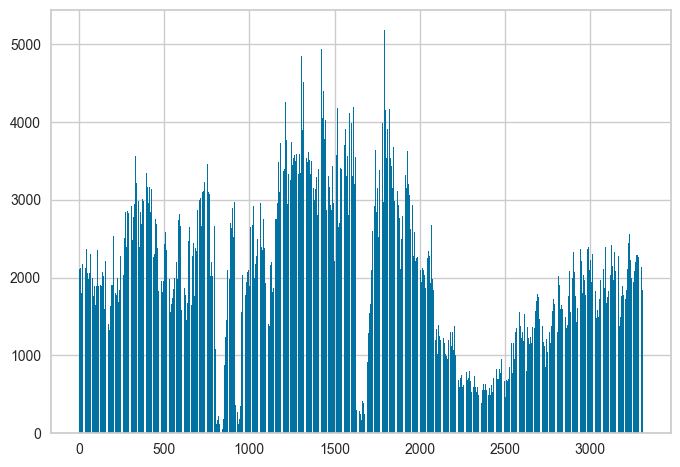

In [25]:
x = np.array(range(0,3308,1))
y = np.array(data['Qt_Apostadores'])
plt.bar(x,y)

In [26]:
i = 0
t = len(data['Hora_Aposta'])
#print(t)
segundo = []
minuto = []
for j in range(0,t):
    #print(data['Hora_Aposta'][j])
    #print(data['Hora_Aposta'][j].split(":"))
    x = data['Hora_Aposta'][j].split(":")
    segundo.append(float(x[2]))
    minuto.append(float(x[1]))

for j in range(0,t):
    segundo[j] = segundo[j]/60
    minuto[j] = minuto[j] + round(segundo[j],6)

for j in range(0,t):
    minuto[j] = round(minuto[j]/60, 6)

data['hour_edi'] = data['hour']
for j in range(0,t):
    data['hour_edi'][j] = data['hour_edi'][j] + minuto[j]

data['hour_edi']

C:\Users\Riallen\AppData\Local\Temp\ipykernel_3596\1362838707.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour_edi'][j] = data['hour_edi'][j] + minuto[j]


0        9.571667
1        9.576667
2        9.585278
3        9.595000
4        9.600278
          ...    
3303     9.479722
3304     9.484444
3305     9.488611
3306     9.495556
3307    12.813611
Name: hour_edi, Length: 3308, dtype: float64

In [27]:
data['hour_edi'].describe()

count    3308.000000
mean       11.405956
std         6.891906
min         0.001111
25%         5.428681
50%        11.017222
75%        17.204375
max        23.995556
Name: hour_edi, dtype: float64

In [28]:
data['hour']

0        9
1        9
2        9
3        9
4        9
        ..
3303     9
3304     9
3305     9
3306     9
3307    12
Name: hour, Length: 3308, dtype: int64

In [29]:
data_hora_145 = data[data['Odds']> 1.45]
data_hora_145

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour,hour_edi
1,1.83,1930,Mon Feb 13 09:34:36 2023,2023-02-13 09:34:36,2023-02-13,09:34:36,9,9.576667
2,4.48,2073,Mon Feb 13 09:35:07 2023,2023-02-13 09:35:07,2023-02-13,09:35:07,9,9.585278
3,6.58,2104,Mon Feb 13 09:35:42 2023,2023-02-13 09:35:42,2023-02-13,09:35:42,9,9.595000
4,1.53,2065,Mon Feb 13 09:36:01 2023,2023-02-13 09:36:01,2023-02-13,09:36:01,9,9.600278
6,1.83,2138,Mon Feb 13 09:36:35 2023,2023-02-13 09:36:35,2023-02-13,09:36:35,9,9.609722
...,...,...,...,...,...,...,...,...
3298,3.71,2324,Tue Feb 14 09:27:12 2023,2023-02-14 09:27:12,2023-02-14,09:27:12,9,9.453333
3300,2.21,1760,Tue Feb 14 09:27:49 2023,2023-02-14 09:27:49,2023-02-14,09:27:49,9,9.463611
3301,1.78,2135,Tue Feb 14 09:28:11 2023,2023-02-14 09:28:11,2023-02-14,09:28:11,9,9.469722
3303,2.03,1922,Tue Feb 14 09:28:47 2023,2023-02-14 09:28:47,2023-02-14,09:28:47,9,9.479722


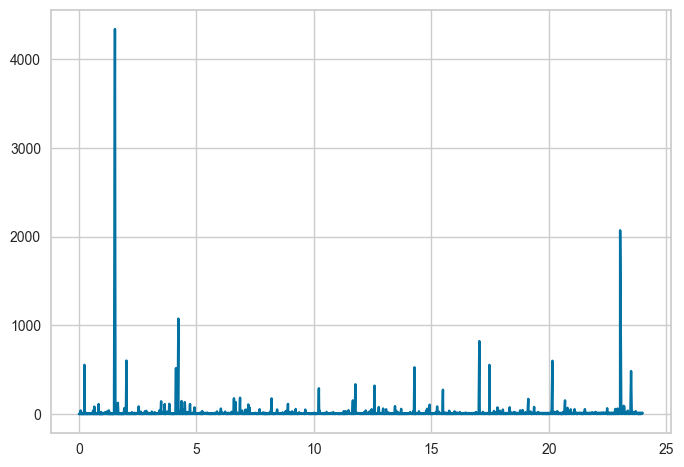

In [30]:
x = np.array(data_hora_145['hour_edi'])
y = np.array(data_hora_145['Odds'])

plt.plot(x,y)

In [31]:
dia_23_01 = data[data['Date_Aposta'] == '2023-02-13']
dia_23_01

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour,hour_edi
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9,9.571667
1,1.83,1930,Mon Feb 13 09:34:36 2023,2023-02-13 09:34:36,2023-02-13,09:34:36,9,9.576667
2,4.48,2073,Mon Feb 13 09:35:07 2023,2023-02-13 09:35:07,2023-02-13,09:35:07,9,9.585278
3,6.58,2104,Mon Feb 13 09:35:42 2023,2023-02-13 09:35:42,2023-02-13,09:35:42,9,9.595000
4,1.53,2065,Mon Feb 13 09:36:01 2023,2023-02-13 09:36:01,2023-02-13,09:36:01,9,9.600278
...,...,...,...,...,...,...,...,...
1867,3.54,3299,Mon Feb 13 23:58:15 2023,2023-02-13 23:58:15,2023-02-13,23:58:15,23,23.970833
1868,15.38,3234,Mon Feb 13 23:59:02 2023,2023-02-13 23:59:02,2023-02-13,23:59:02,23,23.983889
1869,1.11,3110,Mon Feb 13 23:59:16 2023,2023-02-13 23:59:16,2023-02-13,23:59:16,23,23.987778
1870,1.32,2593,Mon Feb 13 23:59:31 2023,2023-02-13 23:59:31,2023-02-13,23:59:31,23,23.991944


In [32]:
array = []
for j in range(9,24):
    x = dia_23_01[dia_23_01['hour'] == j]
    a0 = len(x)
    a = len(x[x['Odds'] >= 1.29])/len(x['Odds'])
    b = len(x[x['Odds'] >= 1.40])/len(x['Odds'])
    c = len(x[x['Odds'] >= 1.45])/len(x['Odds'])
    d = len(x[x['Odds'] >= 1.65])/len(x['Odds'])
    att = [j,a0,a,b,c,d]
    for name in att:
        array.append(name)

    y = np.array(x['Odds'])
    #plt.hist(y, bins = 20)
    #fig, ax = plt.subplots()
    #stats.probplot(y , fit=True,   plot=ax)
    #plt.show()
    print(stats.shapiro(y))
    
    

array

ShapiroResult(statistic=0.35912805795669556, pvalue=4.261720066200871e-15)
ShapiroResult(statistic=0.13126301765441895, pvalue=3.7254030204772147e-26)
ShapiroResult(statistic=0.19761747121810913, pvalue=3.219933946518951e-23)
ShapiroResult(statistic=0.20138144493103027, pvalue=2.0205734920480815e-23)
ShapiroResult(statistic=0.3210524320602417, pvalue=2.3162488145166846e-23)
ShapiroResult(statistic=0.14003479480743408, pvalue=3.1115456808759873e-24)
ShapiroResult(statistic=0.19504451751708984, pvalue=2.044671614980773e-23)
ShapiroResult(statistic=0.6165716648101807, pvalue=2.7081291067500187e-17)
ShapiroResult(statistic=0.12351387739181519, pvalue=8.631721571606551e-26)
ShapiroResult(statistic=0.42008769512176514, pvalue=2.559369193542666e-19)
ShapiroResult(statistic=0.22336310148239136, pvalue=3.1514998212289215e-22)
ShapiroResult(statistic=0.15631771087646484, pvalue=9.437424474729947e-23)
ShapiroResult(statistic=0.43997901678085327, pvalue=5.157279833751475e-19)
ShapiroResult(statist

[9,
 63,
 0.7619047619047619,
 0.7142857142857143,
 0.7142857142857143,
 0.6349206349206349,
 10,
 153,
 0.7450980392156863,
 0.673202614379085,
 0.6274509803921569,
 0.5555555555555556,
 11,
 126,
 0.8015873015873016,
 0.7222222222222222,
 0.7063492063492064,
 0.6349206349206349,
 12,
 129,
 0.7751937984496124,
 0.7054263565891473,
 0.6744186046511628,
 0.5736434108527132,
 13,
 149,
 0.7315436241610739,
 0.6510067114093959,
 0.6510067114093959,
 0.5570469798657718,
 14,
 130,
 0.8153846153846154,
 0.7538461538461538,
 0.7384615384615385,
 0.6615384615384615,
 15,
 128,
 0.703125,
 0.671875,
 0.671875,
 0.5859375,
 16,
 136,
 0.75,
 0.6691176470588235,
 0.6470588235294118,
 0.5514705882352942,
 17,
 147,
 0.7482993197278912,
 0.673469387755102,
 0.6326530612244898,
 0.54421768707483,
 18,
 115,
 0.7913043478260869,
 0.7739130434782608,
 0.7652173913043478,
 0.7043478260869566,
 19,
 118,
 0.7203389830508474,
 0.6779661016949152,
 0.6694915254237288,
 0.5847457627118644,
 20,
 115,
 0.

In [33]:
dia_23_02 = data[data['Date_Aposta'] == '2023-02-14'] 
dia_23_02

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour,hour_edi
1872,1.91,2618,Tue Feb 14 00:00:04 2023,2023-02-14 00:00:04,2023-02-14,00:00:04,0,0.001111
1873,2.38,3085,Tue Feb 14 00:00:29 2023,2023-02-14 00:00:29,2023-02-14,00:00:29,0,0.008056
1874,1.56,3418,Tue Feb 14 00:00:46 2023,2023-02-14 00:00:46,2023-02-14,00:00:46,0,0.012778
1875,1.30,2934,Tue Feb 14 00:01:02 2023,2023-02-14 00:01:02,2023-02-14,00:01:02,0,0.017222
1876,1.04,2465,Tue Feb 14 00:01:15 2023,2023-02-14 00:01:15,2023-02-14,00:01:15,0,0.020833
...,...,...,...,...,...,...,...,...
3303,2.03,1922,Tue Feb 14 09:28:47 2023,2023-02-14 09:28:47,2023-02-14,09:28:47,9,9.479722
3304,1.22,2137,Tue Feb 14 09:29:04 2023,2023-02-14 09:29:04,2023-02-14,09:29:04,9,9.484444
3305,1.01,1793,Tue Feb 14 09:29:19 2023,2023-02-14 09:29:19,2023-02-14,09:29:19,9,9.488611
3306,2.54,2003,Tue Feb 14 09:29:44 2023,2023-02-14 09:29:44,2023-02-14,09:29:44,9,9.495556


In [34]:
array = []
for j in range(0,10):
    x = dia_23_02[dia_23_02['hour'] == j]
    a0 = len(x)
    a = len(x[x['Odds'] >= 1.29])/len(x['Odds'])
    b = len(x[x['Odds'] >= 1.40])/len(x['Odds'])
    c = len(x[x['Odds'] >= 1.45])/len(x['Odds'])
    d = len(x[x['Odds'] >= 1.65])/len(x['Odds'])
    att = [j,a0,a,b,c,d]
    for name in att:
        array.append(name)
    y = np.array(x['Odds'])
    #plt.hist(y, bins = 20)
    #fig, ax = plt.subplots()
    #stats.probplot(y , fit=True,   plot=ax)
    #plt.show()
    print(stats.shapiro(y))

array

ShapiroResult(statistic=0.14058691263198853, pvalue=1.9673853245136987e-25)
ShapiroResult(statistic=0.06322085857391357, pvalue=5.977508768394664e-27)
ShapiroResult(statistic=0.1051587462425232, pvalue=2.0067051795917865e-27)
ShapiroResult(statistic=0.3074641823768616, pvalue=6.5079667839976494e-24)
ShapiroResult(statistic=0.15692102909088135, pvalue=3.094418573851314e-25)
ShapiroResult(statistic=0.5648741722106934, pvalue=9.180168052856849e-20)
ShapiroResult(statistic=0.2740759253501892, pvalue=5.95933729581314e-24)
ShapiroResult(statistic=0.31115514039993286, pvalue=2.3262651392024568e-23)
ShapiroResult(statistic=0.2700777053833008, pvalue=1.0384241523358259e-23)
ShapiroResult(statistic=0.433707058429718, pvalue=1.697008698725599e-15)


[0,
 145,
 0.7931034482758621,
 0.7241379310344828,
 0.6896551724137931,
 0.6,
 1,
 153,
 0.7581699346405228,
 0.6666666666666666,
 0.6470588235294118,
 0.5947712418300654,
 2,
 166,
 0.7228915662650602,
 0.6506024096385542,
 0.6204819277108434,
 0.5602409638554217,
 3,
 154,
 0.7467532467532467,
 0.6688311688311688,
 0.6428571428571429,
 0.5844155844155844,
 4,
 145,
 0.7655172413793103,
 0.7172413793103448,
 0.6896551724137931,
 0.6206896551724138,
 5,
 158,
 0.759493670886076,
 0.7151898734177216,
 0.6772151898734177,
 0.6012658227848101,
 6,
 148,
 0.6959459459459459,
 0.6756756756756757,
 0.6554054054054054,
 0.5743243243243243,
 7,
 147,
 0.8367346938775511,
 0.7619047619047619,
 0.7482993197278912,
 0.673469387755102,
 8,
 144,
 0.7569444444444444,
 0.7013888888888888,
 0.6944444444444444,
 0.6041666666666666,
 9,
 75,
 0.7066666666666667,
 0.6533333333333333,
 0.6266666666666667,
 0.6]

In [35]:
X = np.array(data['Odds'])
Y = np.array(data['Qt_Apostadores'])

np.corrcoef(X,Y)


array([[ 1.        , -0.01330877],
       [-0.01330877,  1.        ]])

In [36]:
data1 = dia_23_01[dia_23_01['hour'] == 9]
data2 = dia_23_01[dia_23_01['hour'] == 10]
data3 = dia_23_01[dia_23_01['hour'] == 11]
data4 = dia_23_01[dia_23_01['hour'] == 12]
data5 = dia_23_01[dia_23_01['hour'] == 13]
data6 = dia_23_01[dia_23_01['hour'] == 14]
data7 = dia_23_01[dia_23_01['hour'] == 15]
data8 = dia_23_01[dia_23_01['hour'] == 16]
data9 = dia_23_01[dia_23_01['hour'] == 17]
data10 = dia_23_01[dia_23_01['hour'] == 18]
data11 = dia_23_01[dia_23_01['hour'] == 19]
data12 = dia_23_01[dia_23_01['hour'] == 20]
data13 = dia_23_01[dia_23_01['hour'] == 21]
data14 = dia_23_01[dia_23_01['hour'] == 22]
data15 = dia_23_01[dia_23_01['hour'] == 23]
data16 = dia_23_02[dia_23_02['hour'] == 0]
data17 = dia_23_02[dia_23_02['hour'] == 1]
data18 = dia_23_02[dia_23_02['hour'] == 2]
data19 = dia_23_02[dia_23_02['hour'] == 3]
data20 = dia_23_02[dia_23_02['hour'] == 4]
data21 = dia_23_02[dia_23_02['hour'] == 5]
data22 = dia_23_02[dia_23_02['hour'] == 6]
data23 = dia_23_02[dia_23_02['hour'] == 7]
data24 = dia_23_02[dia_23_02['hour'] == 8]
data25 = dia_23_02[dia_23_02['hour'] == 9]

(array([42., 16.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.   ,  3.523,  6.046,  8.569, 11.092, 13.615, 16.138, 18.661,
        21.184, 23.707, 26.23 , 28.753, 31.276, 33.799, 36.322, 38.845,
        41.368, 43.891, 46.414, 48.937, 51.46 ]),
 <BarContainer object of 20 artists>)

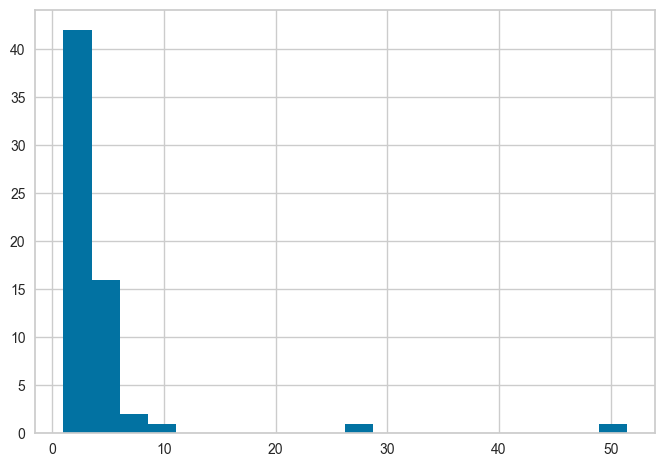

In [37]:
plt.hist(np.array(data1['Odds']), bins = 20)
    

(array([148.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.   ,  15.523,  30.046,  44.569,  59.092,  73.615,  88.138,
        102.661, 117.184, 131.707, 146.23 , 160.753, 175.276, 189.799,
        204.322, 218.845, 233.368, 247.891, 262.414, 276.937, 291.46 ]),
 <BarContainer object of 20 artists>)

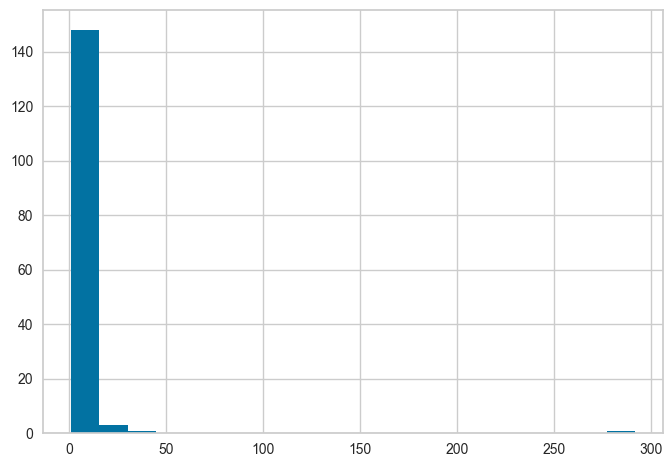

In [38]:
plt.hist(np.array(data2['Odds']), bins = 20)

(array([116.,   7.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.    ,  17.7745,  34.549 ,  51.3235,  68.098 ,  84.8725,
        101.647 , 118.4215, 135.196 , 151.9705, 168.745 , 185.5195,
        202.294 , 219.0685, 235.843 , 252.6175, 269.392 , 286.1665,
        302.941 , 319.7155, 336.49  ]),
 <BarContainer object of 20 artists>)

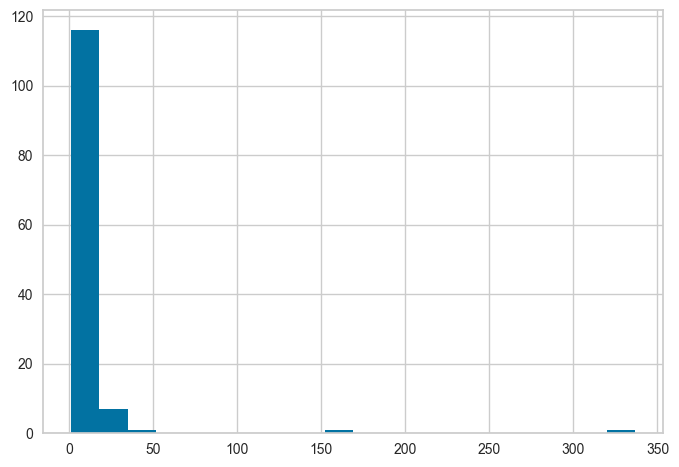

In [39]:
plt.hist(np.array(data3['Odds']), bins = 20)

(array([120.,   4.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.   ,  17.002,  33.004,  49.006,  65.008,  81.01 ,  97.012,
        113.014, 129.016, 145.018, 161.02 , 177.022, 193.024, 209.026,
        225.028, 241.03 , 257.032, 273.034, 289.036, 305.038, 321.04 ]),
 <BarContainer object of 20 artists>)

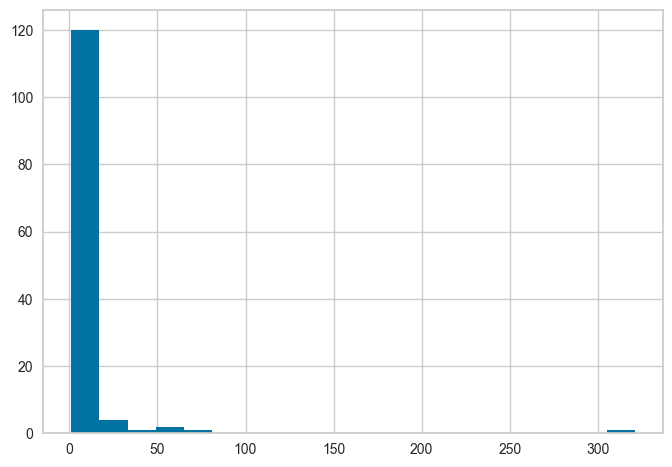

In [40]:
plt.hist(np.array(data4['Odds']), bins = 20)

(array([126.,  13.,   3.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1.   ,  5.464,  9.928, 14.392, 18.856, 23.32 , 27.784, 32.248,
        36.712, 41.176, 45.64 , 50.104, 54.568, 59.032, 63.496, 67.96 ,
        72.424, 76.888, 81.352, 85.816, 90.28 ]),
 <BarContainer object of 20 artists>)

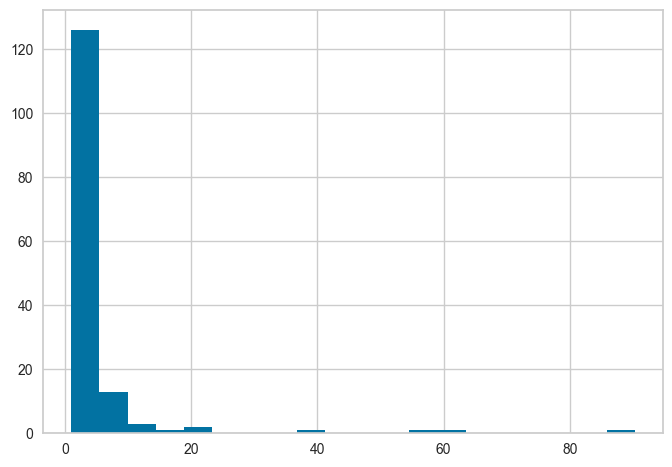

In [41]:
plt.hist(np.array(data5['Odds']), bins = 20)

(array([124.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.   ,  27.322,  53.644,  79.966, 106.288, 132.61 , 158.932,
        185.254, 211.576, 237.898, 264.22 , 290.542, 316.864, 343.186,
        369.508, 395.83 , 422.152, 448.474, 474.796, 501.118, 527.44 ]),
 <BarContainer object of 20 artists>)

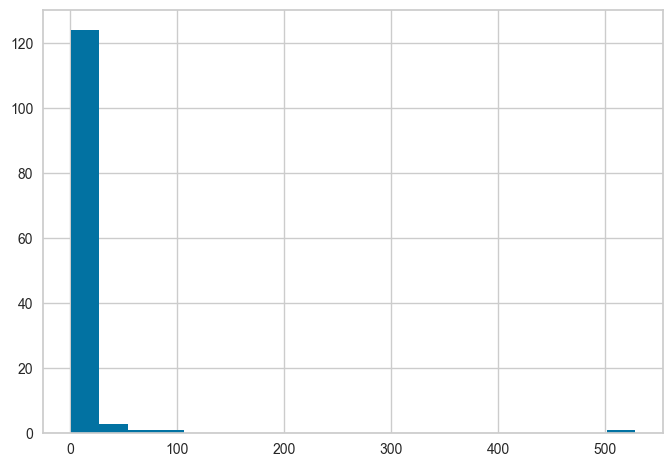

In [42]:
plt.hist(np.array(data6['Odds']), bins = 20)

(array([119.,   4.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.   ,  14.676,  28.352,  42.028,  55.704,  69.38 ,  83.056,
         96.732, 110.408, 124.084, 137.76 , 151.436, 165.112, 178.788,
        192.464, 206.14 , 219.816, 233.492, 247.168, 260.844, 274.52 ]),
 <BarContainer object of 20 artists>)

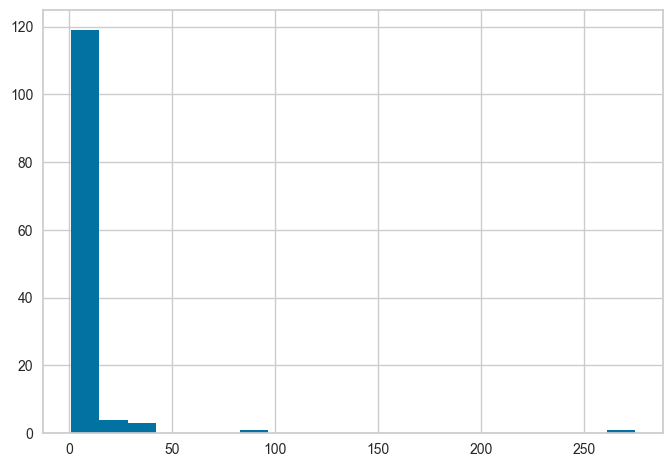

In [43]:
plt.hist(np.array(data7['Odds']), bins = 20)

(array([76., 18., 13.,  5.,  8.,  3.,  1.,  3.,  2.,  0.,  1.,  0.,  0.,
         1.,  2.,  1.,  0.,  1.,  0.,  1.]),
 array([ 1.    ,  2.1335,  3.267 ,  4.4005,  5.534 ,  6.6675,  7.801 ,
         8.9345, 10.068 , 11.2015, 12.335 , 13.4685, 14.602 , 15.7355,
        16.869 , 18.0025, 19.136 , 20.2695, 21.403 , 22.5365, 23.67  ]),
 <BarContainer object of 20 artists>)

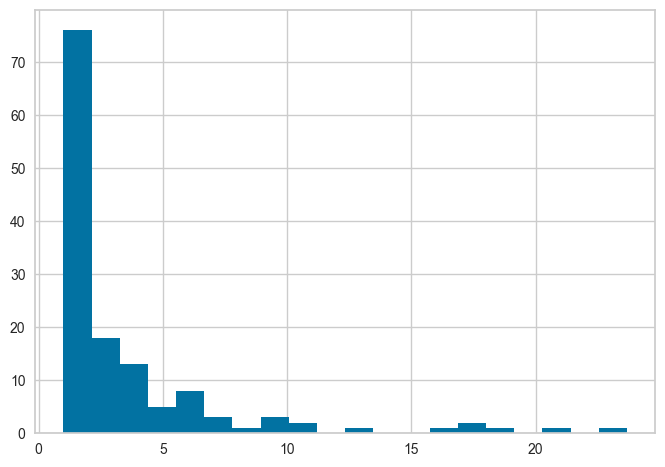

In [44]:
plt.hist(np.array(data8['Odds']), bins = 20)

(array([144.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.   ,  42.117,  83.234, 124.351, 165.468, 206.585, 247.702,
        288.819, 329.936, 371.053, 412.17 , 453.287, 494.404, 535.521,
        576.638, 617.755, 658.872, 699.989, 741.106, 782.223, 823.34 ]),
 <BarContainer object of 20 artists>)

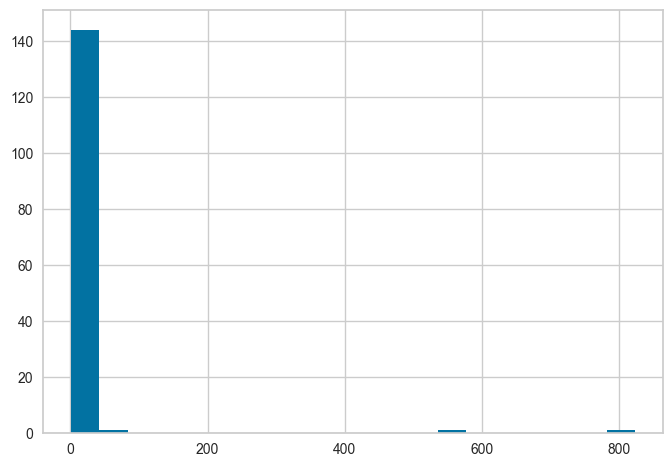

In [45]:
plt.hist(np.array(data9['Odds']), bins = 20)

(array([88., 14.,  4.,  1.,  3.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.    ,  4.8255,  8.651 , 12.4765, 16.302 , 20.1275, 23.953 ,
        27.7785, 31.604 , 35.4295, 39.255 , 43.0805, 46.906 , 50.7315,
        54.557 , 58.3825, 62.208 , 66.0335, 69.859 , 73.6845, 77.51  ]),
 <BarContainer object of 20 artists>)

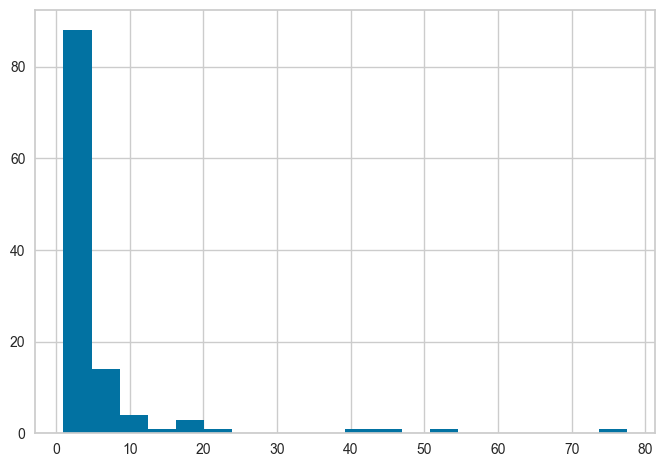

In [46]:
plt.hist(np.array(data10['Odds']), bins = 20)

(array([110.,   3.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.    ,   9.5365,  18.073 ,  26.6095,  35.146 ,  43.6825,
         52.219 ,  60.7555,  69.292 ,  77.8285,  86.365 ,  94.9015,
        103.438 , 111.9745, 120.511 , 129.0475, 137.584 , 146.1205,
        154.657 , 163.1935, 171.73  ]),
 <BarContainer object of 20 artists>)

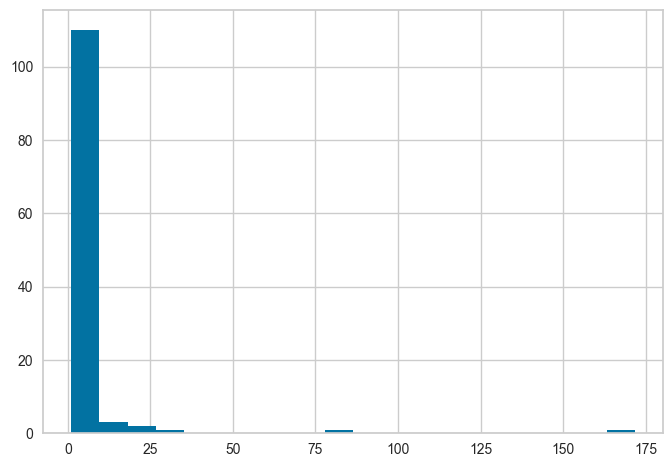

In [47]:
plt.hist(np.array(data11['Odds']), bins = 20)

(array([109.,   3.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.    ,  31.0075,  61.015 ,  91.0225, 121.03  , 151.0375,
        181.045 , 211.0525, 241.06  , 271.0675, 301.075 , 331.0825,
        361.09  , 391.0975, 421.105 , 451.1125, 481.12  , 511.1275,
        541.135 , 571.1425, 601.15  ]),
 <BarContainer object of 20 artists>)

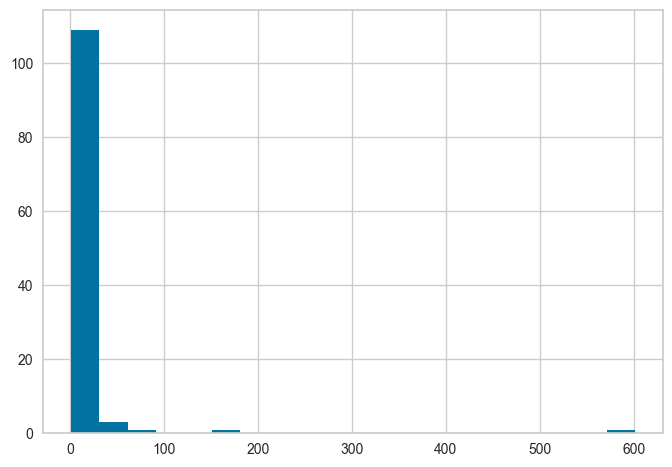

In [48]:
plt.hist(np.array(data12['Odds']), bins = 20)

(array([80., 17.,  5.,  5.,  3.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 1.   ,  3.764,  6.528,  9.292, 12.056, 14.82 , 17.584, 20.348,
        23.112, 25.876, 28.64 , 31.404, 34.168, 36.932, 39.696, 42.46 ,
        45.224, 47.988, 50.752, 53.516, 56.28 ]),
 <BarContainer object of 20 artists>)

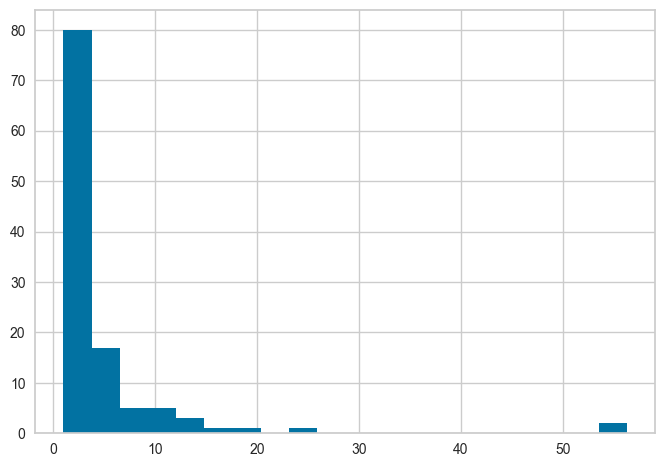

In [49]:
plt.hist(np.array(data13['Odds']), bins = 20)

(array([100.,   8.,   6.,   6.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.]),
 array([ 1.   ,  4.273,  7.546, 10.819, 14.092, 17.365, 20.638, 23.911,
        27.184, 30.457, 33.73 , 37.003, 40.276, 43.549, 46.822, 50.095,
        53.368, 56.641, 59.914, 63.187, 66.46 ]),
 <BarContainer object of 20 artists>)

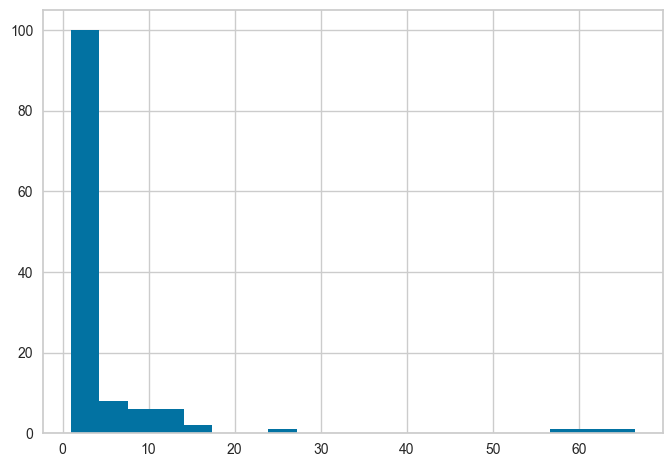

In [50]:
plt.hist(np.array(data14['Odds']), bins = 20)

(array([120.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 1.04510e+02, 2.08020e+02, 3.11530e+02, 4.15040e+02,
        5.18550e+02, 6.22060e+02, 7.25570e+02, 8.29080e+02, 9.32590e+02,
        1.03610e+03, 1.13961e+03, 1.24312e+03, 1.34663e+03, 1.45014e+03,
        1.55365e+03, 1.65716e+03, 1.76067e+03, 1.86418e+03, 1.96769e+03,
        2.07120e+03]),
 <BarContainer object of 20 artists>)

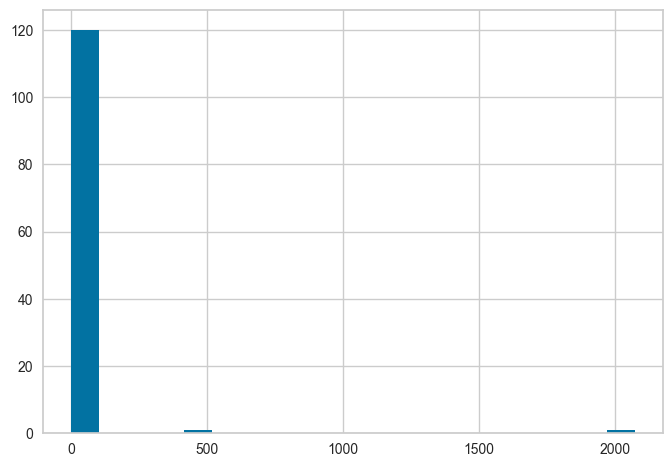

In [51]:
plt.hist(np.array(data15['Odds']), bins = 20)

(array([139.,   3.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  28.7,  56.4,  84.1, 111.8, 139.5, 167.2, 194.9, 222.6,
        250.3, 278. , 305.7, 333.4, 361.1, 388.8, 416.5, 444.2, 471.9,
        499.6, 527.3, 555. ]),
 <BarContainer object of 20 artists>)

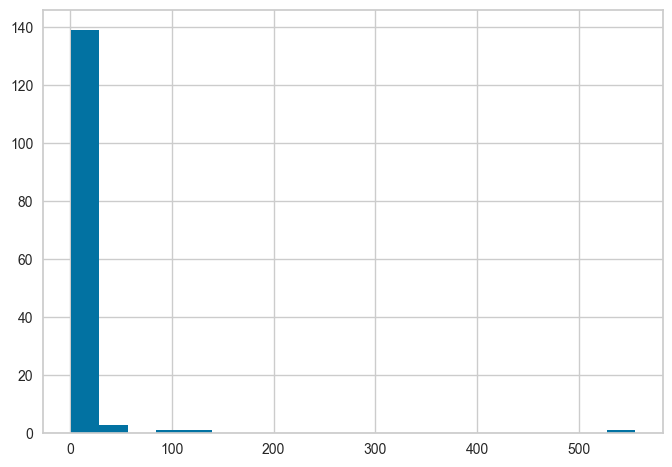

In [52]:
plt.hist(np.array(data16['Odds']), bins = 20)

(array([152.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.000000e+00, 2.179450e+02, 4.348900e+02, 6.518350e+02,
        8.687800e+02, 1.085725e+03, 1.302670e+03, 1.519615e+03,
        1.736560e+03, 1.953505e+03, 2.170450e+03, 2.387395e+03,
        2.604340e+03, 2.821285e+03, 3.038230e+03, 3.255175e+03,
        3.472120e+03, 3.689065e+03, 3.906010e+03, 4.122955e+03,
        4.339900e+03]),
 <BarContainer object of 20 artists>)

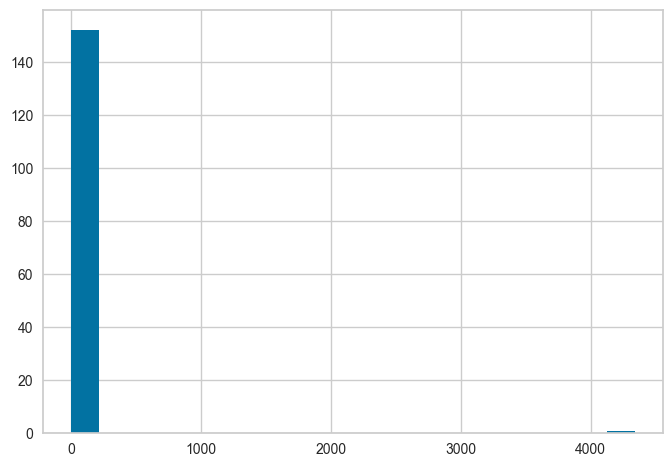

In [53]:
plt.hist(np.array(data17['Odds']), bins = 20)

(array([162.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.   ,  31.118,  61.236,  91.354, 121.472, 151.59 , 181.708,
        211.826, 241.944, 272.062, 302.18 , 332.298, 362.416, 392.534,
        422.652, 452.77 , 482.888, 513.006, 543.124, 573.242, 603.36 ]),
 <BarContainer object of 20 artists>)

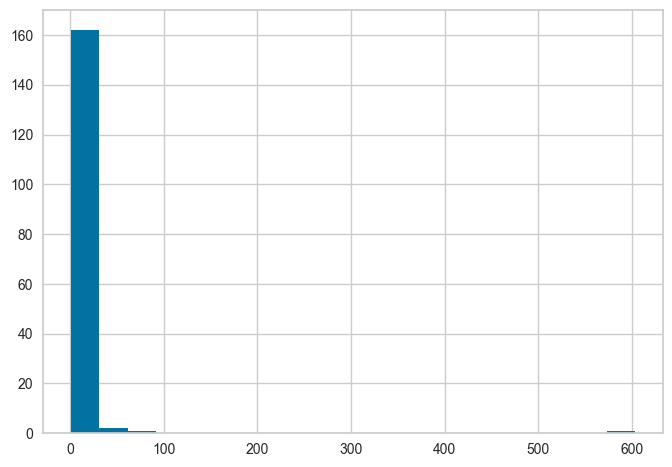

In [54]:
plt.hist(np.array(data18['Odds']), bins = 20)

(array([131.,  12.,   3.,   4.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.]),
 array([  1.    ,   8.1935,  15.387 ,  22.5805,  29.774 ,  36.9675,
         44.161 ,  51.3545,  58.548 ,  65.7415,  72.935 ,  80.1285,
         87.322 ,  94.5155, 101.709 , 108.9025, 116.096 , 123.2895,
        130.483 , 137.6765, 144.87  ]),
 <BarContainer object of 20 artists>)

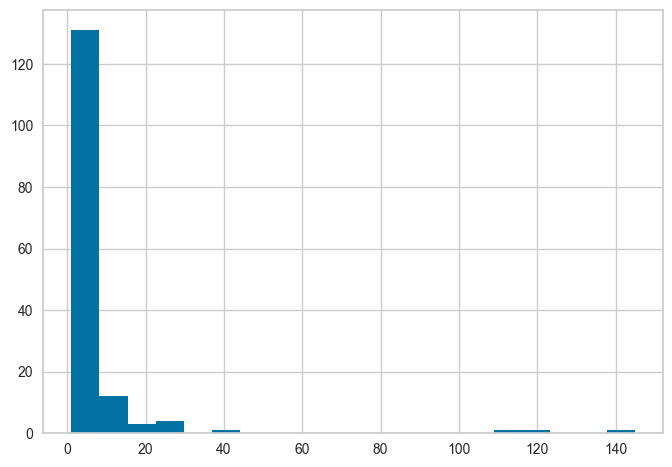

In [55]:
plt.hist(np.array(data19['Odds']), bins = 20)

(array([138.,   2.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.000000e+00, 5.472900e+01, 1.084580e+02, 1.621870e+02,
        2.159160e+02, 2.696450e+02, 3.233740e+02, 3.771030e+02,
        4.308320e+02, 4.845610e+02, 5.382900e+02, 5.920190e+02,
        6.457480e+02, 6.994770e+02, 7.532060e+02, 8.069350e+02,
        8.606640e+02, 9.143930e+02, 9.681220e+02, 1.021851e+03,
        1.075580e+03]),
 <BarContainer object of 20 artists>)

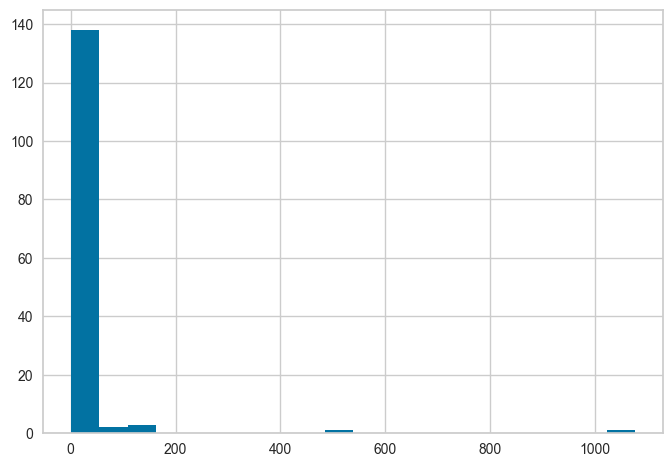

In [56]:
plt.hist(np.array(data20['Odds']), bins = 20)

(array([104.,  18.,  15.,   3.,   2.,   3.,   2.,   3.,   2.,   3.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([ 1.    ,  2.6705,  4.341 ,  6.0115,  7.682 ,  9.3525, 11.023 ,
        12.6935, 14.364 , 16.0345, 17.705 , 19.3755, 21.046 , 22.7165,
        24.387 , 26.0575, 27.728 , 29.3985, 31.069 , 32.7395, 34.41  ]),
 <BarContainer object of 20 artists>)

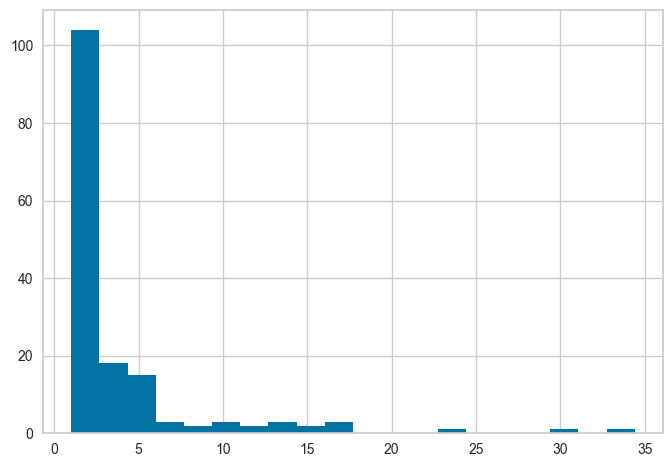

In [57]:
plt.hist(np.array(data21['Odds']), bins = 20)

(array([129.,  10.,   2.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   2.]),
 array([  1.    ,  10.1945,  19.389 ,  28.5835,  37.778 ,  46.9725,
         56.167 ,  65.3615,  74.556 ,  83.7505,  92.945 , 102.1395,
        111.334 , 120.5285, 129.723 , 138.9175, 148.112 , 157.3065,
        166.501 , 175.6955, 184.89  ]),
 <BarContainer object of 20 artists>)

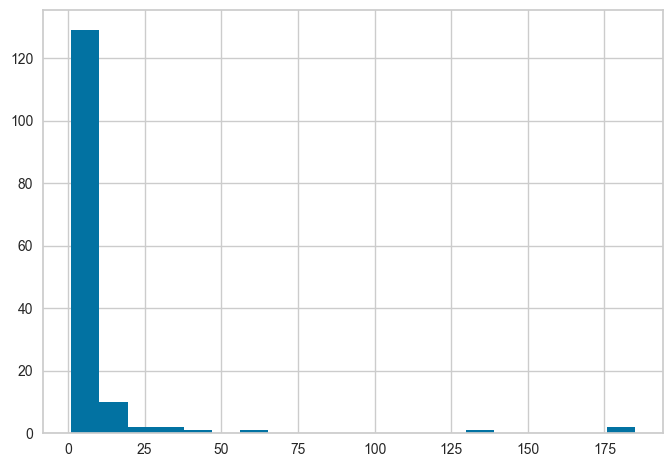

In [58]:
plt.hist(np.array(data22['Odds']), bins = 20)

(array([131.,   4.,   5.,   2.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.    ,   6.3945,  11.789 ,  17.1835,  22.578 ,  27.9725,
         33.367 ,  38.7615,  44.156 ,  49.5505,  54.945 ,  60.3395,
         65.734 ,  71.1285,  76.523 ,  81.9175,  87.312 ,  92.7065,
         98.101 , 103.4955, 108.89  ]),
 <BarContainer object of 20 artists>)

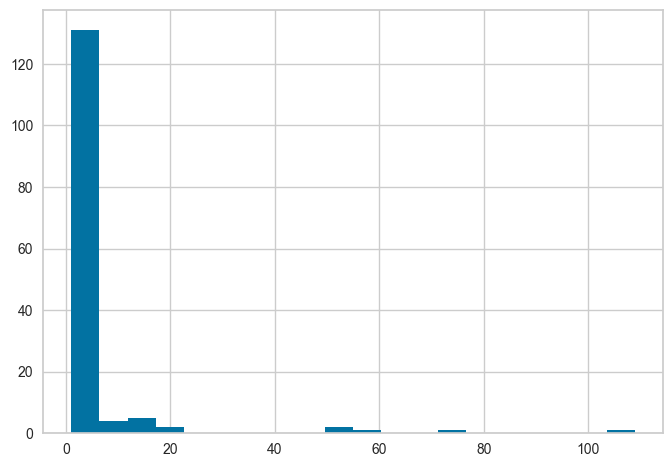

In [59]:
plt.hist(np.array(data23['Odds']), bins = 20)

(array([129.,   6.,   3.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.    ,   9.7945,  18.589 ,  27.3835,  36.178 ,  44.9725,
         53.767 ,  62.5615,  71.356 ,  80.1505,  88.945 ,  97.7395,
        106.534 , 115.3285, 124.123 , 132.9175, 141.712 , 150.5065,
        159.301 , 168.0955, 176.89  ]),
 <BarContainer object of 20 artists>)

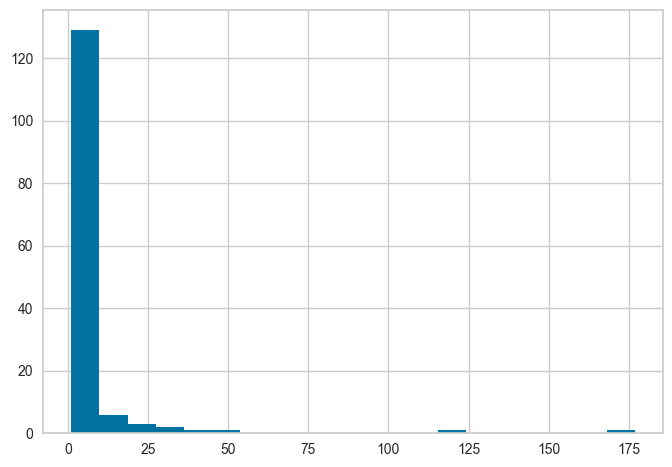

In [60]:
plt.hist(np.array(data24['Odds']), bins = 20)

(array([57.,  9.,  1.,  1.,  2.,  1.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.    ,  3.8565,  6.713 ,  9.5695, 12.426 , 15.2825, 18.139 ,
        20.9955, 23.852 , 26.7085, 29.565 , 32.4215, 35.278 , 38.1345,
        40.991 , 43.8475, 46.704 , 49.5605, 52.417 , 55.2735, 58.13  ]),
 <BarContainer object of 20 artists>)

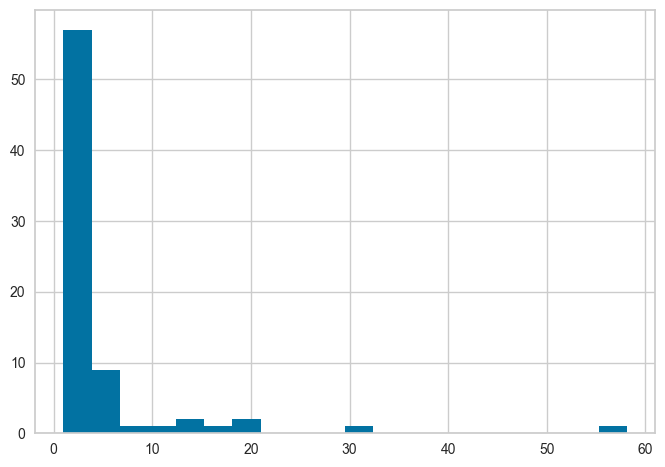

In [61]:
plt.hist(np.array(data25['Odds']), bins = 20)

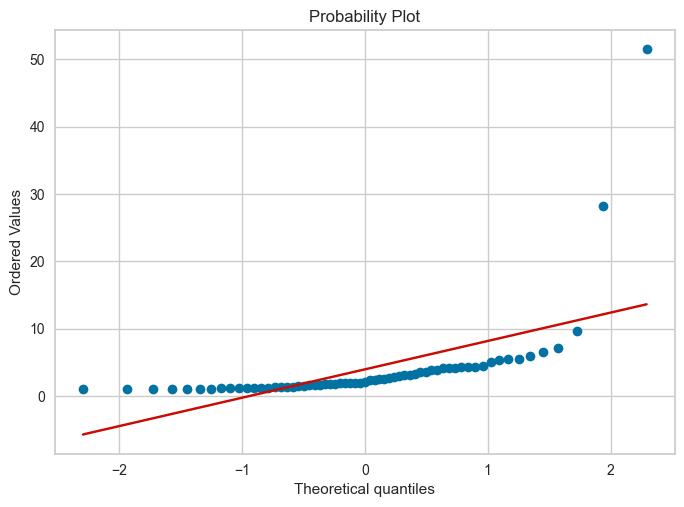

In [62]:
fig, ax = plt.subplots()
stats.probplot(np.array(data1['Odds']) , fit=True,   plot=ax)
plt.show()

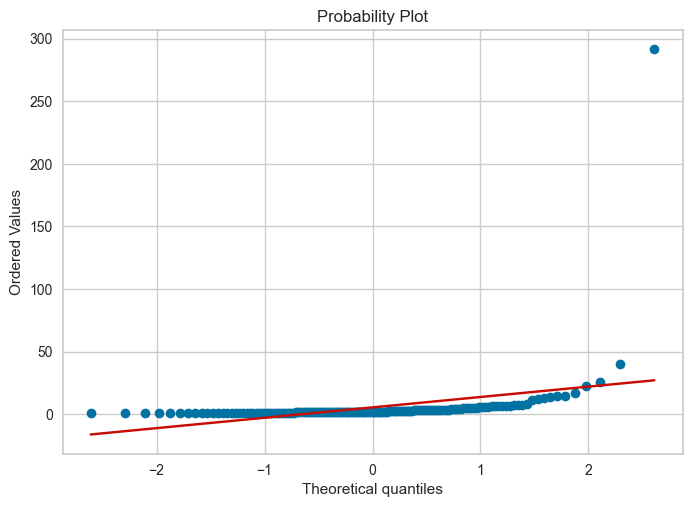

In [63]:
fig, ax = plt.subplots()
stats.probplot(np.array(data2['Odds']) , fit=True,   plot=ax)
plt.show()

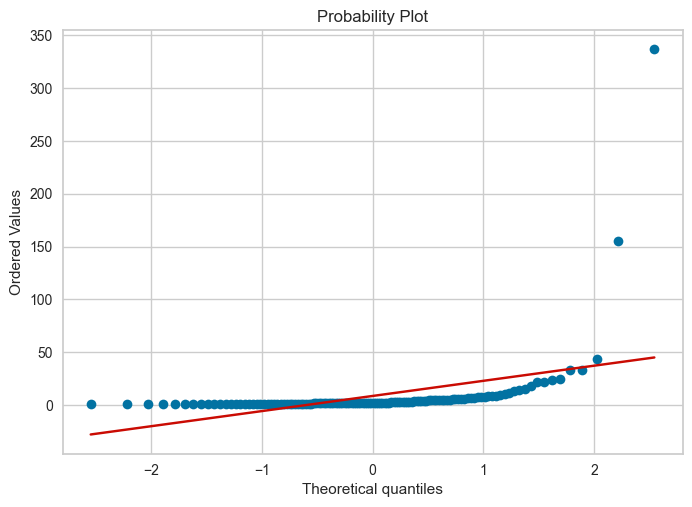

In [64]:
fig, ax = plt.subplots()
stats.probplot(np.array(data3['Odds']) , fit=True,   plot=ax)
plt.show()

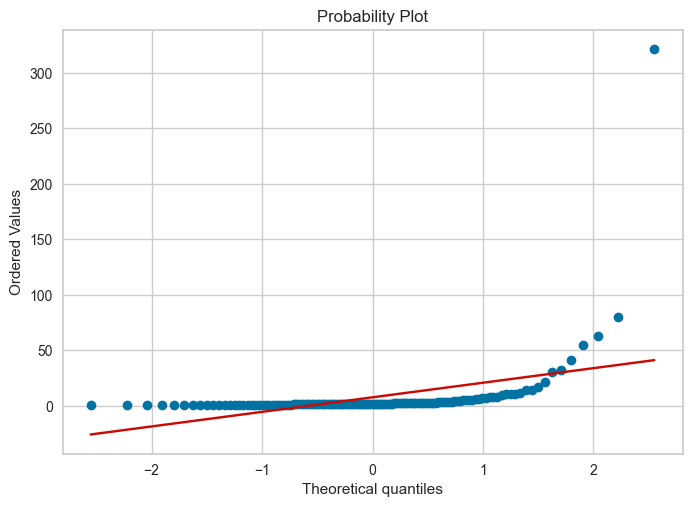

In [65]:
fig, ax = plt.subplots()
stats.probplot(np.array(data4['Odds']) , fit=True,   plot=ax)
plt.show()

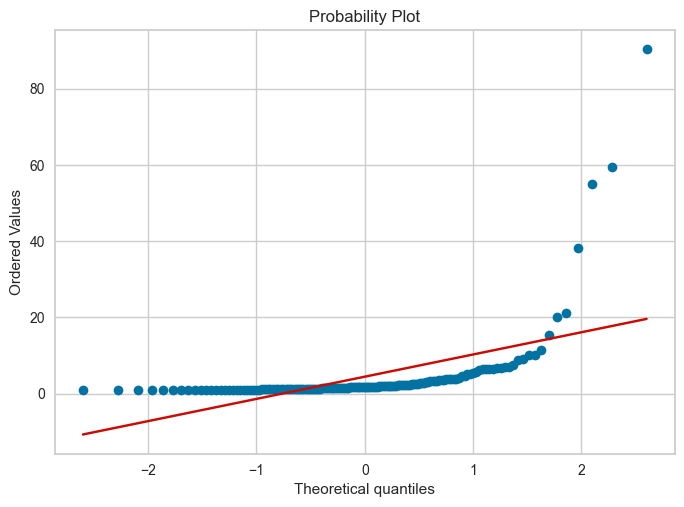

In [66]:
fig, ax = plt.subplots()
stats.probplot(np.array(data5['Odds']) , fit=True,   plot=ax)
plt.show()

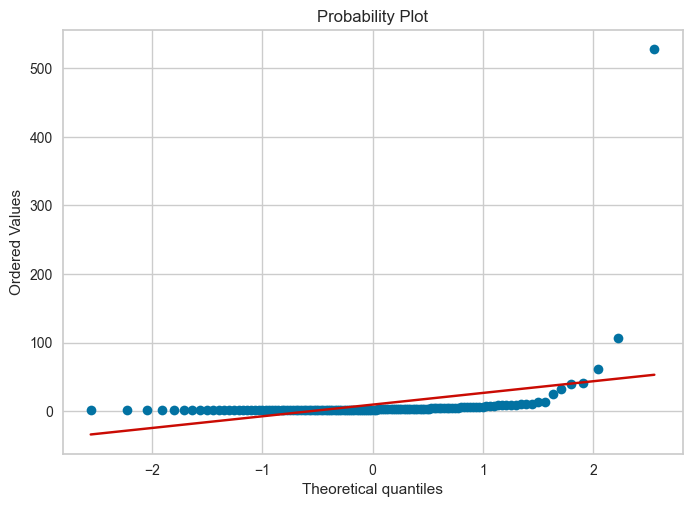

In [67]:
fig, ax = plt.subplots()
stats.probplot(np.array(data6['Odds']) , fit=True,   plot=ax)
plt.show()

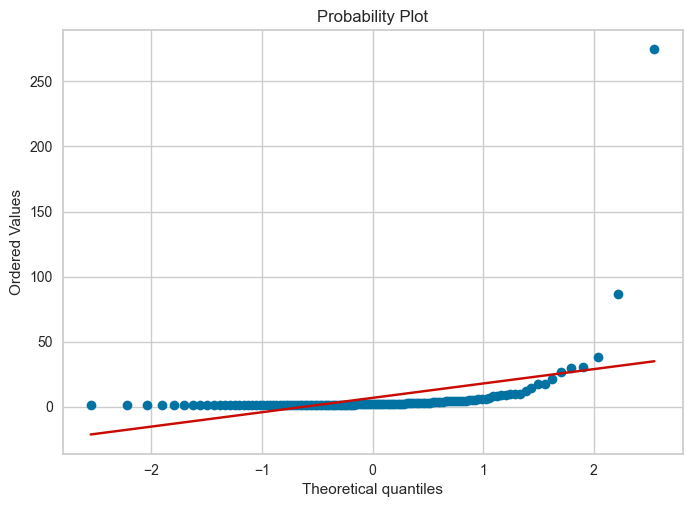

In [68]:
fig, ax = plt.subplots()
stats.probplot(np.array(data7['Odds']) , fit=True,   plot=ax)
plt.show()

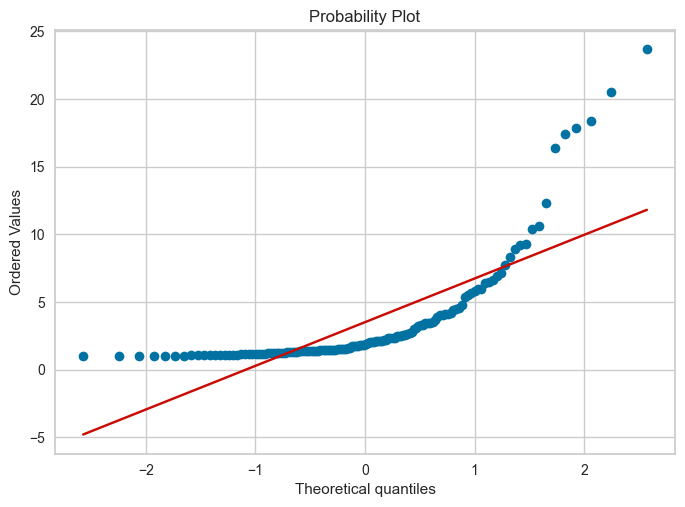

In [69]:
fig, ax = plt.subplots()
stats.probplot(np.array(data8['Odds']) , fit=True,   plot=ax)
plt.show()

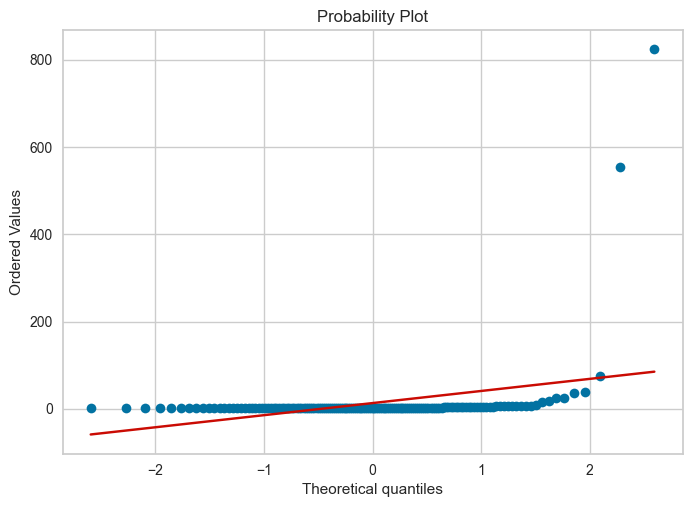

In [70]:
fig, ax = plt.subplots()
stats.probplot(np.array(data9['Odds']) , fit=True,   plot=ax)
plt.show()

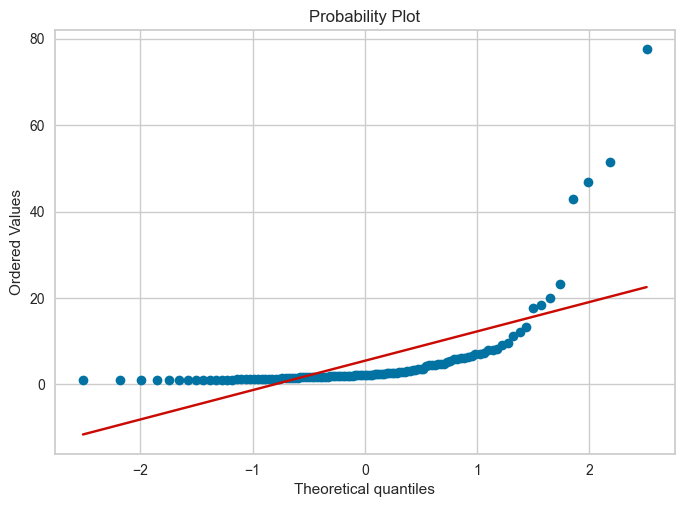

In [71]:
fig, ax = plt.subplots()
stats.probplot(np.array(data10['Odds']) , fit=True,   plot=ax)
plt.show()

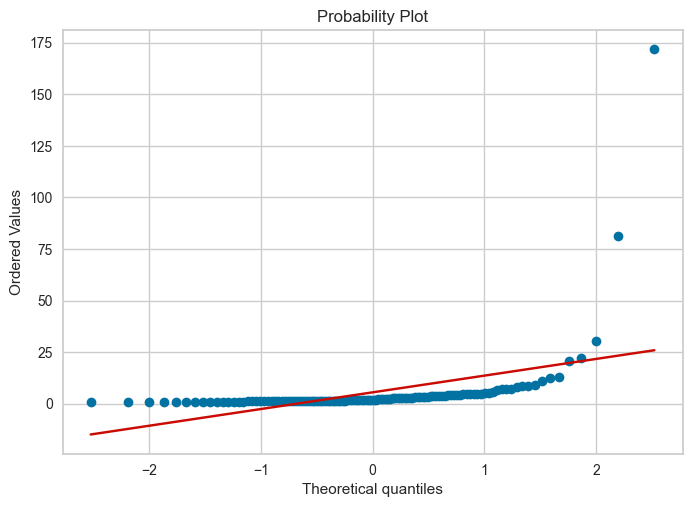

In [72]:
fig, ax = plt.subplots()
stats.probplot(np.array(data11['Odds']) , fit=True,   plot=ax)
plt.show()

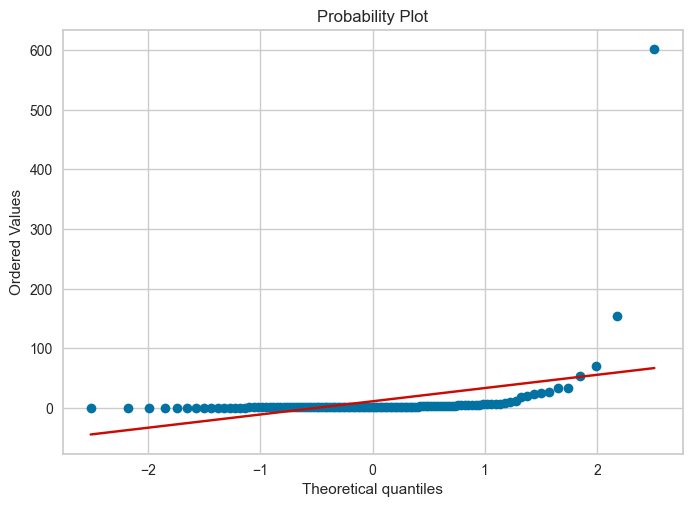

In [73]:
fig, ax = plt.subplots()
stats.probplot(np.array(data12['Odds']) , fit=True,   plot=ax)
plt.show()

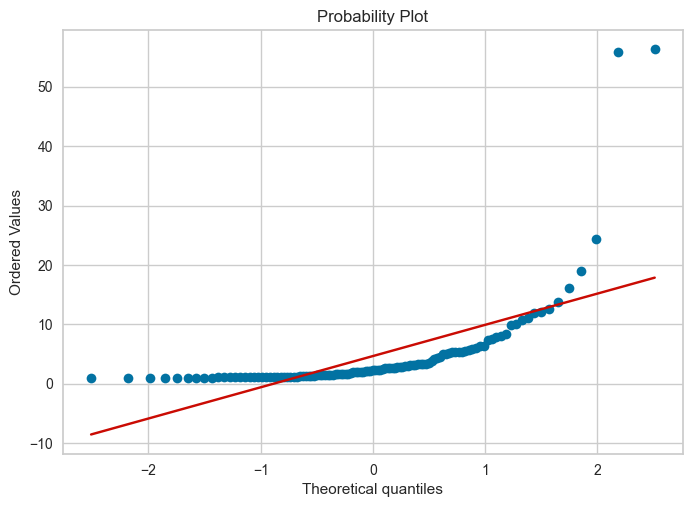

In [74]:
fig, ax = plt.subplots()
stats.probplot(np.array(data13['Odds']) , fit=True,   plot=ax)
plt.show()

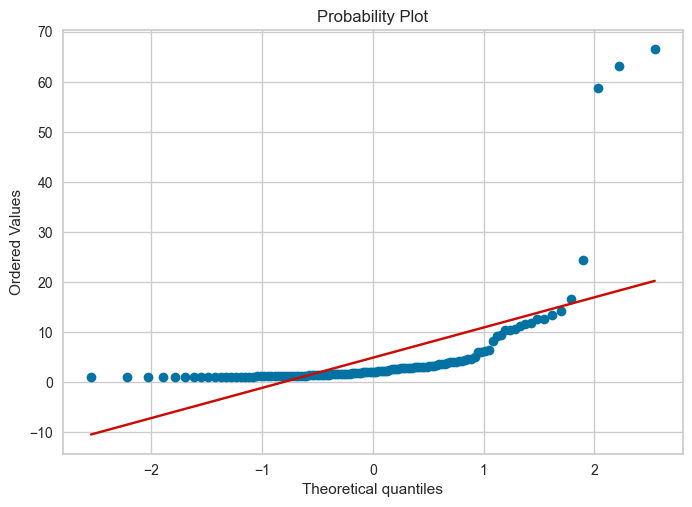

In [75]:
fig, ax = plt.subplots()
stats.probplot(np.array(data14['Odds']) , fit=True,   plot=ax)
plt.show()

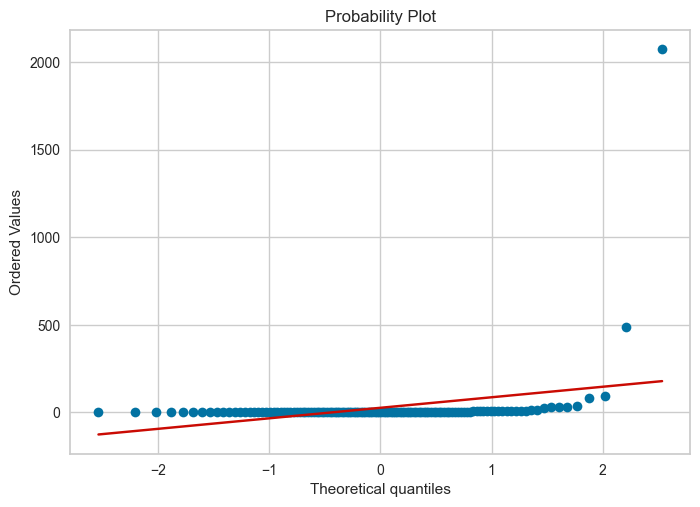

In [76]:
fig, ax = plt.subplots()
stats.probplot(np.array(data15['Odds']) , fit=True,   plot=ax)
plt.show()

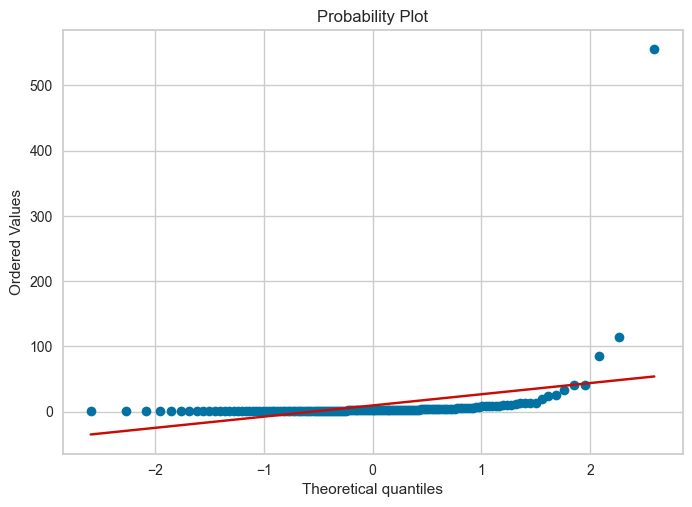

In [77]:
fig, ax = plt.subplots()
stats.probplot(np.array(data16['Odds']) , fit=True,   plot=ax)
plt.show()

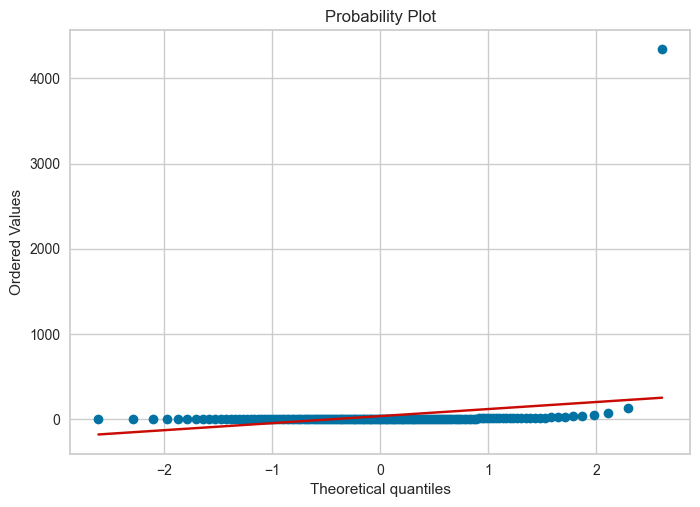

In [78]:
fig, ax = plt.subplots()
stats.probplot(np.array(data17['Odds']) , fit=True,   plot=ax)
plt.show()

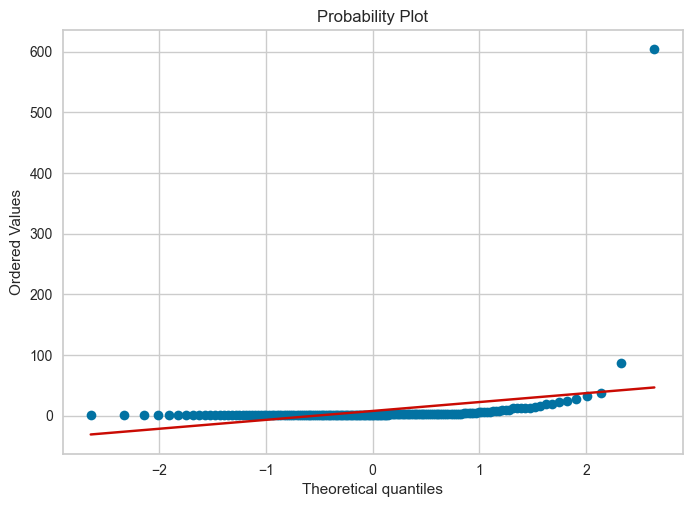

In [79]:
fig, ax = plt.subplots()
stats.probplot(np.array(data18['Odds']) , fit=True,   plot=ax)
plt.show()

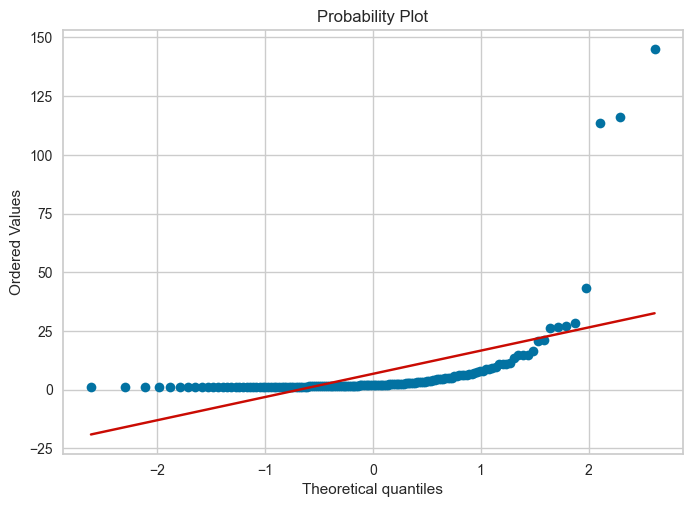

In [80]:
fig, ax = plt.subplots()
stats.probplot(np.array(data19['Odds']) , fit=True,   plot=ax)
plt.show()

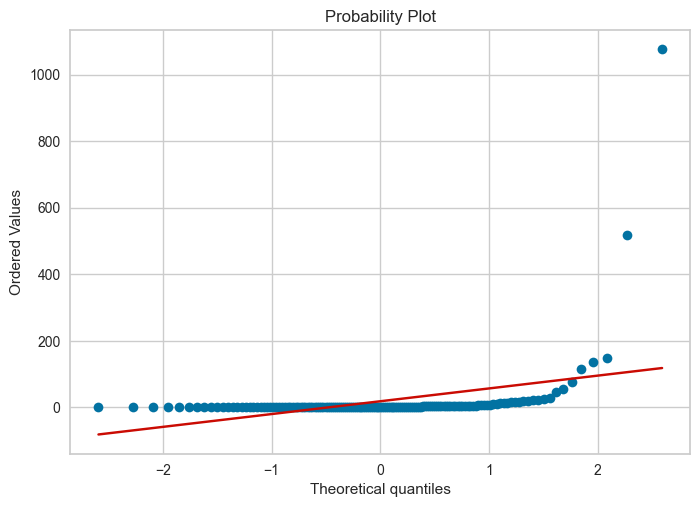

In [81]:
fig, ax = plt.subplots()
stats.probplot(np.array(data20['Odds']) , fit=True,   plot=ax)
plt.show()

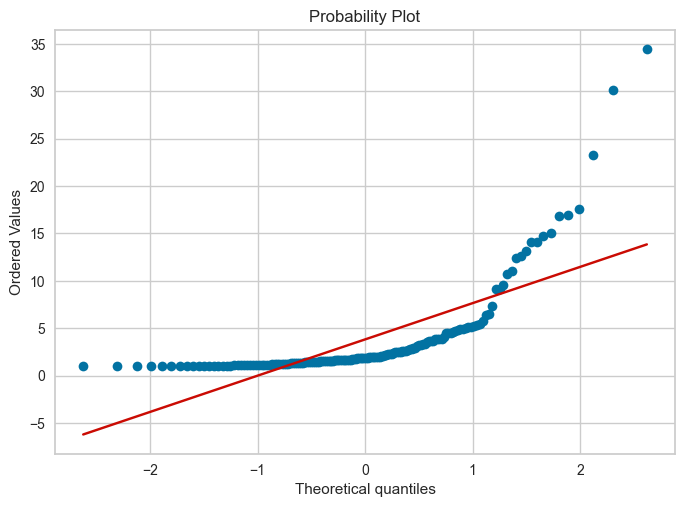

In [82]:
fig, ax = plt.subplots()
stats.probplot(np.array(data21['Odds']) , fit=True,   plot=ax)
plt.show()

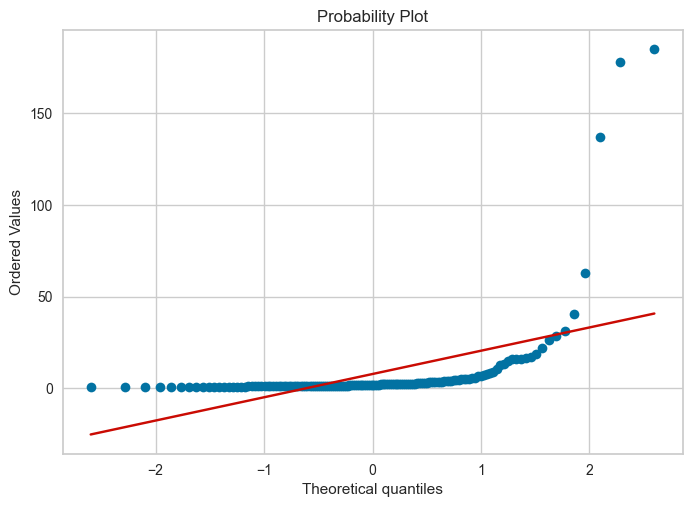

In [83]:
fig, ax = plt.subplots()
stats.probplot(np.array(data22['Odds']) , fit=True,   plot=ax)
plt.show()

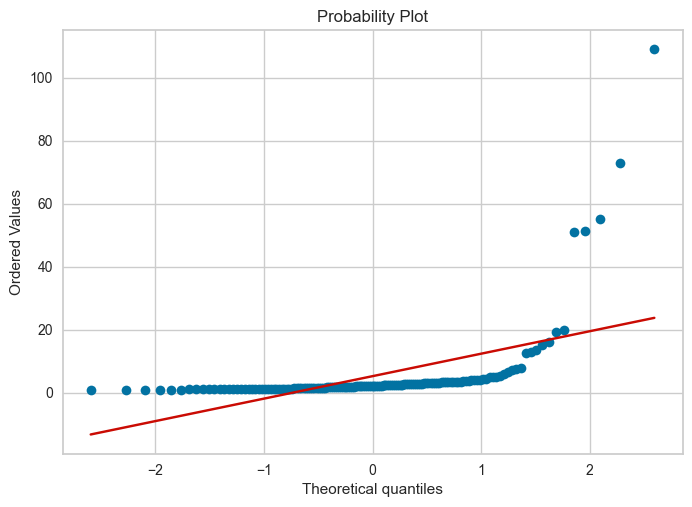

In [84]:
fig, ax = plt.subplots()
stats.probplot(np.array(data23['Odds']) , fit=True,   plot=ax)
plt.show()

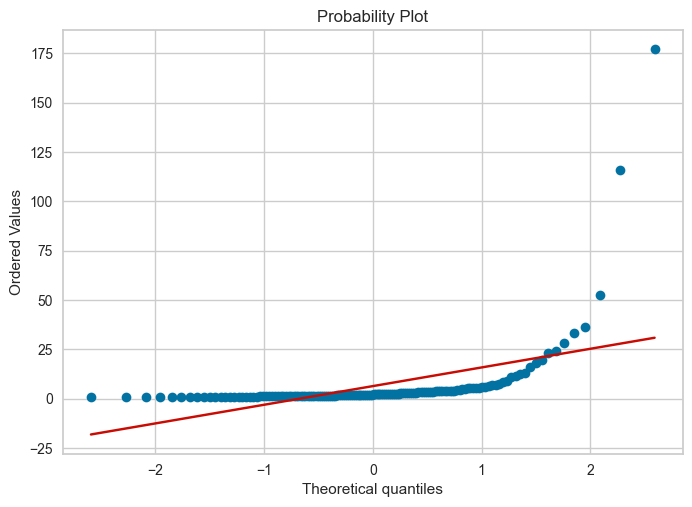

In [85]:
fig, ax = plt.subplots()
stats.probplot(np.array(data24['Odds']) , fit=True,   plot=ax)
plt.show()

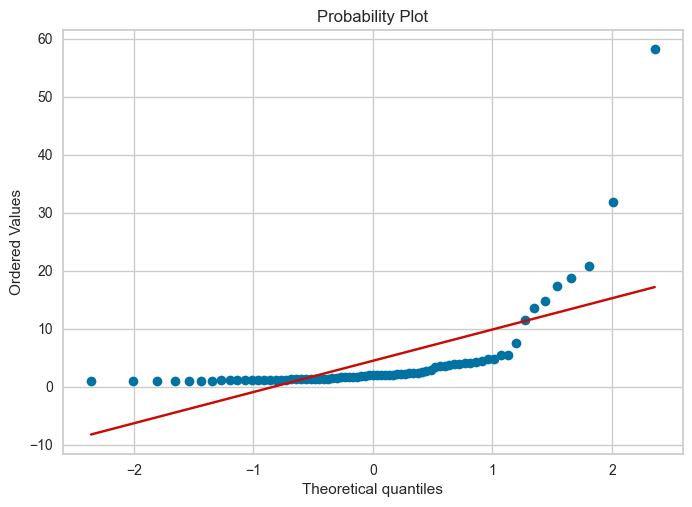

In [86]:
fig, ax = plt.subplots()
stats.probplot(np.array(data25['Odds']) , fit=True,   plot=ax)
plt.show()

(array([3.293e+03, 4.000e+00, 7.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.000000e+00, 2.179450e+02, 4.348900e+02, 6.518350e+02,
        8.687800e+02, 1.085725e+03, 1.302670e+03, 1.519615e+03,
        1.736560e+03, 1.953505e+03, 2.170450e+03, 2.387395e+03,
        2.604340e+03, 2.821285e+03, 3.038230e+03, 3.255175e+03,
        3.472120e+03, 3.689065e+03, 3.906010e+03, 4.122955e+03,
        4.339900e+03]),
 <BarContainer object of 20 artists>)

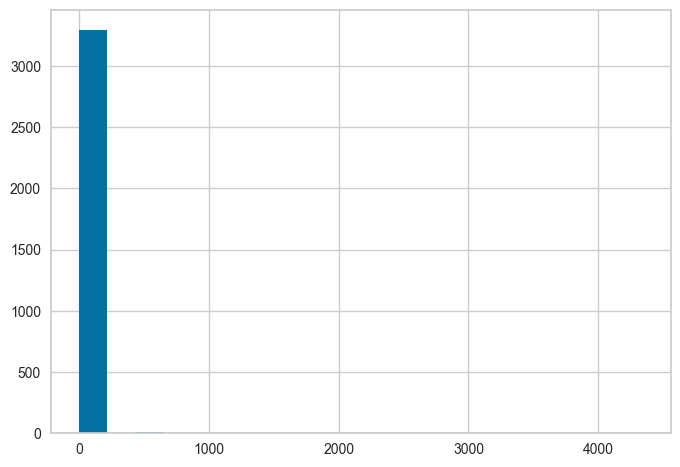

In [87]:
plt.hist(np.array(data['Odds']), bins = 20) 

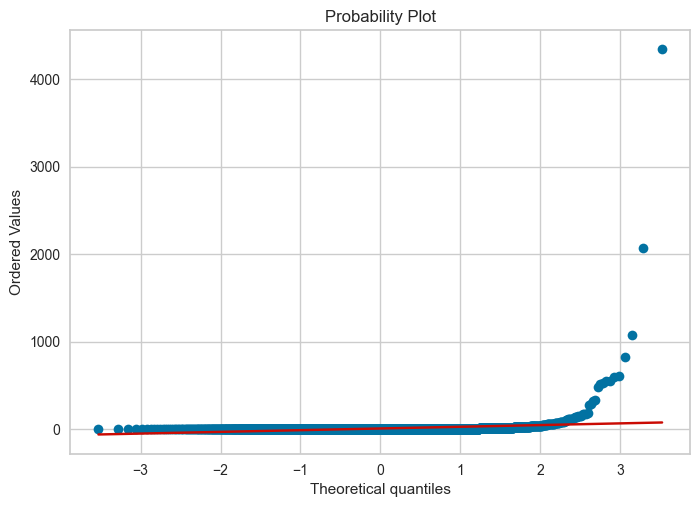

In [88]:
fig, ax = plt.subplots()
stats.probplot(np.array(data['Odds']) , fit=True,   plot=ax)
plt.show()
   

In [89]:
np.corrcoef(np.array(data['Odds']), np.array(data['Qt_Apostadores']))

array([[ 1.        , -0.01330877],
       [-0.01330877,  1.        ]])

In [90]:
np.corrcoef(np.array(data1['Odds']), np.array(data1['Qt_Apostadores']))

array([[ 1.        , -0.03680078],
       [-0.03680078,  1.        ]])

In [91]:
np.corrcoef(np.array(data2['Odds']), np.array(data2['Qt_Apostadores']))

array([[ 1.        , -0.03879483],
       [-0.03879483,  1.        ]])

In [92]:
np.corrcoef(np.array(data3['Odds']), np.array(data3['Qt_Apostadores']))

array([[ 1.        , -0.03779138],
       [-0.03779138,  1.        ]])

In [93]:
np.corrcoef(np.array(data4['Odds']), np.array(data4['Qt_Apostadores']))

array([[1.        , 0.03375897],
       [0.03375897, 1.        ]])

In [94]:
np.corrcoef(np.array(data5['Odds']), np.array(data5['Qt_Apostadores']))

array([[ 1.        , -0.10912121],
       [-0.10912121,  1.        ]])

In [95]:
np.corrcoef(np.array(data6['Odds']), np.array(data6['Qt_Apostadores']))

array([[ 1.        , -0.07720657],
       [-0.07720657,  1.        ]])

In [96]:
np.corrcoef(np.array(data7['Odds']), np.array(data7['Qt_Apostadores']))

array([[ 1.       , -0.0924368],
       [-0.0924368,  1.       ]])

In [97]:
np.corrcoef(np.array(data8['Odds']), np.array(data8['Qt_Apostadores']))

array([[ 1.        , -0.01788603],
       [-0.01788603,  1.        ]])

In [98]:
np.corrcoef(np.array(data9['Odds']), np.array(data9['Qt_Apostadores']))

array([[ 1.        , -0.02253553],
       [-0.02253553,  1.        ]])

In [99]:
np.corrcoef(np.array(data10['Odds']), np.array(data10['Qt_Apostadores']))

array([[ 1.        , -0.08131699],
       [-0.08131699,  1.        ]])

In [100]:
np.corrcoef(np.array(data11['Odds']), np.array(data11['Qt_Apostadores']))

array([[1.        , 0.01659748],
       [0.01659748, 1.        ]])

In [101]:
np.corrcoef(np.array(data12['Odds']), np.array(data12['Qt_Apostadores']))

array([[ 1.        , -0.10059171],
       [-0.10059171,  1.        ]])

In [102]:
np.corrcoef(np.array(data13['Odds']), np.array(data13['Qt_Apostadores']))

array([[ 1.       , -0.0430003],
       [-0.0430003,  1.       ]])

In [103]:
np.corrcoef(np.array(data14['Odds']), np.array(data14['Qt_Apostadores']))

array([[1.        , 0.06948408],
       [0.06948408, 1.        ]])

In [104]:
np.corrcoef(np.array(data15['Odds']), np.array(data15['Qt_Apostadores']))

array([[ 1.        , -0.02925513],
       [-0.02925513,  1.        ]])

In [105]:
np.corrcoef(np.array(data16['Odds']), np.array(data16['Qt_Apostadores']))

array([[ 1.        , -0.07358643],
       [-0.07358643,  1.        ]])

In [106]:
np.corrcoef(np.array(data17['Odds']), np.array(data17['Qt_Apostadores']))

array([[ 1.        , -0.07706821],
       [-0.07706821,  1.        ]])

In [107]:
np.corrcoef(np.array(data18['Odds']), np.array(data18['Qt_Apostadores']))

array([[1.        , 0.09706919],
       [0.09706919, 1.        ]])

In [108]:
np.corrcoef(np.array(data19['Odds']), np.array(data19['Qt_Apostadores']))

array([[1.        , 0.03984119],
       [0.03984119, 1.        ]])

In [109]:
np.corrcoef(np.array(data20['Odds']), np.array(data20['Qt_Apostadores']))

array([[ 1.        , -0.15150163],
       [-0.15150163,  1.        ]])

In [110]:
np.corrcoef(np.array(data21['Odds']), np.array(data21['Qt_Apostadores']))

array([[1.        , 0.00528281],
       [0.00528281, 1.        ]])

In [111]:
np.corrcoef(np.array(data22['Odds']), np.array(data22['Qt_Apostadores']))

array([[ 1.       , -0.1296922],
       [-0.1296922,  1.       ]])

In [112]:
np.corrcoef(np.array(data23['Odds']), np.array(data23['Qt_Apostadores']))

array([[ 1.        , -0.12166989],
       [-0.12166989,  1.        ]])

In [113]:
np.corrcoef(np.array(data24['Odds']), np.array(data24['Qt_Apostadores']))

array([[1.        , 0.10895616],
       [0.10895616, 1.        ]])

In [114]:
np.corrcoef(np.array(data25['Odds']), np.array(data25['Qt_Apostadores']))

array([[ 1.      , -0.167901],
       [-0.167901,  1.      ]])

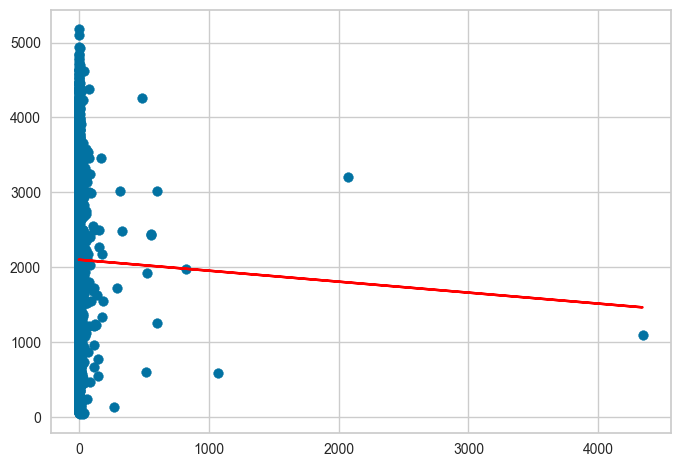

In [115]:
modelo = LinearRegression()
modelo.fit(np.array(data['Odds']).reshape(-1,1), np.array(data['Qt_Apostadores']))
plt.scatter(np.array(data['Odds']).reshape(-1,1), np.array(data['Qt_Apostadores']))
plt.plot(np.array(data['Odds']).reshape(-1,1), modelo.predict(np.array(data['Odds']).reshape(-1,1)), color = 'red')

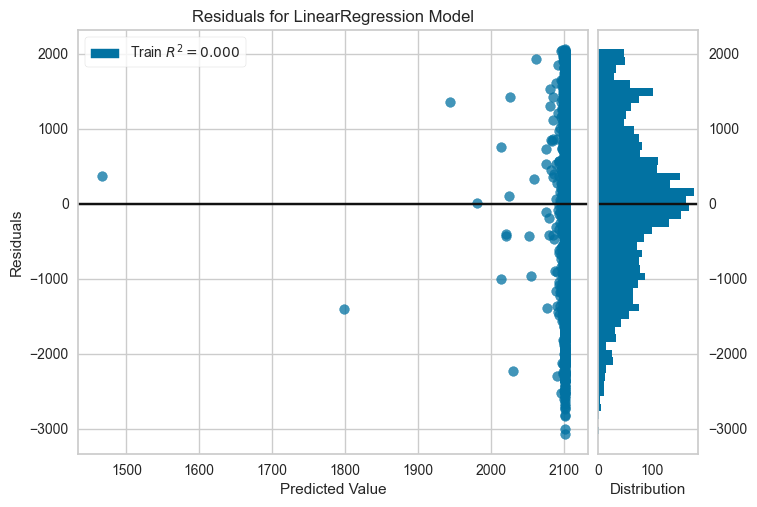

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [116]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(np.array(data['Odds']).reshape(-1,1), np.array(data['Qt_Apostadores']))
visualizador.poof()

In [117]:
modelo.score(np.array(data['Odds']).reshape(-1,1), np.array(data['Qt_Apostadores']))

0.00017712325294949594

In [118]:
modelo.score(np.array(data7['Odds']).reshape(-1,1), np.array(data7['Qt_Apostadores']))

-0.3357435556534063

In [119]:
modelo.score(np.array(data2['Odds']).reshape(-1,1), np.array(data2['Qt_Apostadores']))

-0.3461456185472793

In [120]:
modelo_ajustado2 = sm.ols(formula = 'Odds ~ Qt_Apostadores + Hora_Aposta' , data = data)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

c:\Users\Riallen\Documents\Print_de_telas\venv\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\Riallen\Documents\Print_de_telas\venv\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\Riallen\Documents\Print_de_telas\venv\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Odds   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Feb 2023   Prob (F-statistic):                nan
Time:                        01:10:45   Log-Likelihood:                 73273.
No. Observations:                3308   AIC:                        -1.399e+05
Df Residuals:                       0   BIC:                        -1.197e+05
Df Model:                        3307                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  12.1485        inf          0        nan         nan         nan
Hora_Aposta[T.00:00:29]     2.2963        inf          0        nan         nan         nan
Hora_Aposta[T.00:00:46]     2.7787        inf          0        nan         nan         nan
Hora_Aposta[T.00:01:02]     0.6258        inf          0        nan         nan         nan
Hora_Aposta[T.00:01:15]    -1.4684        inf         -0        nan         nan         nan
Hora_Aposta[T.00:01:35]    -1.1012        inf         -0        nan         nan         nan
Hora_Aposta[T.00:01:51]    -0.1151        inf         -0        nan         nan         nan
Hora_Aposta[T.00:02:20]     1.0688        inf          0        nan         nan         nan
Hora_Aposta[T.00:03:02]    11.2633        inf          0        nan         nan         nan
Hora_Aposta[T.00:03:34]     3.5688        inf          0        nan         nan         nan
Hora_Aposta[T.00:04:30]    39.9165        inf          0        nan         nan         nan
Hora_Aposta[T.00:04:57]     1.5690        inf          0        nan         nan         nan
Hora_Aposta[T.00:05:29]     2.6403        inf          0        nan         nan         nan
Hora_Aposta[T.00:06:09]     7.3463        inf          0        nan         nan         nan
Hora_Aposta[T.00:06:27]     1.1105        inf          0        nan         nan         nan
Hora_Aposta[T.00:06:40]    -2.8362        inf         -0        nan         nan         nan
Hora_Aposta[T.00:06:58]    -3.3143        inf         -0        nan         nan         nan
Hora_Aposta[T.00:07:19]    -1.4443        inf         -0        nan         nan         nan
Hora_Aposta[T.00:07:43]     1.7149        inf          0        nan         nan         nan
Hora_Aposta[T.00:08:00]     1.5619        inf          0        nan         nan         nan
Hora_Aposta[T.00:08:16]    -1.1366        inf         -0        nan         nan         nan
Hora_Aposta[T.00:08:36]    -0.7093        inf         -0        nan         nan         nan
Hora_Aposta[T.00:08:50]    -0.4589        inf         -0        nan         nan         nan
Hora_Aposta[T.00:09:15]     0.2670        inf          0        nan         nan         nan
Hora_Aposta[T.00:09:45]     4.3432        inf          0        nan         nan         nan
Hora_Aposta[T.00:10:08]     2.4911        inf          0        nan         nan         nan
Hora_Aposta[T.00:10:32]     1.7055        inf          0        nan         nan         nan
Hora_Aposta[T.00:11:16]    12.6470        inf          0        nan         nan         nan
Hora_Aposta[T.00:11:39]     1.0353        inf          0        nan         nan         nan
Hora_Aposta[T.00:11:51]    -0.9726        inf         -0        nan         nan         nan
Hora_Aposta[T.00:12:05]    -3.3250        inf  

In [121]:
modelo_ajustado2 = sm.ols(formula = 'Odds ~ Qt_Apostadores + Hora_Aposta' , data = data7)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

c:\Users\Riallen\Documents\Print_de_telas\venv\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\Riallen\Documents\Print_de_telas\venv\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\Riallen\Documents\Print_de_telas\venv\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Odds   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Feb 2023   Prob (F-statistic):                nan
Time:                        01:10:51   Log-Likelihood:                 3095.9
No. Observations:                 128   AIC:                            -5936.
Df Residuals:                       0   BIC:                            -5571.
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.7917        inf          0        nan         nan         nan
Hora_Aposta[T.15:01:07]    -7.6236        inf         -0        nan         nan         nan
Hora_Aposta[T.15:01:37]    -6.1163        inf         -0        nan         nan         nan
Hora_Aposta[T.15:02:08]    -6.3880        inf         -0        nan         nan         nan
Hora_Aposta[T.15:02:36]    -7.8328        inf         -0        nan         nan         nan
Hora_Aposta[T.15:03:13]    -3.8988        inf         -0        nan         nan         nan
Hora_Aposta[T.15:03:30]    -8.6453        inf         -0        nan         nan         nan
Hora_Aposta[T.15:04:01]    -5.9401        inf         -0        nan         nan         nan
Hora_Aposta[T.15:04:23]    -8.3018        inf         -0        nan         nan         nan
Hora_Aposta[T.15:04:48]    -7.4889        inf         -0        nan         nan         nan
Hora_Aposta[T.15:05:27]    -4.5848        inf         -0        nan         nan         nan
Hora_Aposta[T.15:05:42]    -8.4852        inf         -0        nan         nan         nan
Hora_Aposta[T.15:06:23]    -0.0521        inf         -0        nan         nan         nan
Hora_Aposta[T.15:06:40]    -8.3864        inf         -0        nan         nan         nan
Hora_Aposta[T.15:06:55]    -8.5327        inf         -0        nan         nan         nan
Hora_Aposta[T.15:07:08]    -8.4361        inf         -0        nan         nan         nan
Hora_Aposta[T.15:07:21]    -8.3302        inf         -0        nan         nan         nan
Hora_Aposta[T.15:07:34]    -8.0844        inf         -0        nan         nan         nan
Hora_Aposta[T.15:07:48]    -7.9501        inf         -0        nan         nan         nan
Hora_Aposta[T.15:08:16]    -5.9885        inf         -0        nan         nan         nan
Hora_Aposta[T.15:08:31]    -8.3923        inf         -0        nan         nan         nan
Hora_Aposta[T.15:08:47]    -8.0742        inf         -0        nan         nan         nan
Hora_Aposta[T.15:09:00]    -7.7856        inf         -0        nan         nan         nan
Hora_Aposta[T.15:09:44]     5.8015        inf          0        nan         nan         nan
Hora_Aposta[T.15:10:00]    -8.0159        inf         -0        nan         nan         nan
Hora_Aposta[T.15:10:38]    -4.3110        inf         -0        nan         nan         nan
Hora_Aposta[T.15:11:29]    12.5490        inf          0        nan         nan         nan
Hora_Aposta[T.15:11:43]    -7.8692        inf         -0        nan         nan         nan
Hora_Aposta[T.15:12:01]    -7.4198        inf         -0        nan         nan         nan
Hora_Aposta[T.15:12:26]    -7.0828        inf         -0        nan         nan         nan
Hora_Aposta[T.15:12:41]    -7.9220        inf  